<a href="https://colab.research.google.com/github/siaSim/keras_deeplearning/blob/main/dramareview_multi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow-datasets

In [2]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

# IMDb 리뷰 데이터셋 로드
(train_data, test_data), info = tfds.load(
    'imdb_reviews/subwords8k',
    split=(tfds.Split.TRAIN, tfds.Split.TEST),
    as_supervised=True,
    with_info=True
)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteWJ0Q6D/imdb_reviews-train.tfrecord…

Generating test examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteWJ0Q6D/imdb_reviews-test.tfrecord*…

Generating unsupervised examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteWJ0Q6D/imdb_reviews-unsupervised.t…

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [3]:
# Tokenizer 생성
tokenizer = info.features['text'].encoder
vocab_size = tokenizer.vocab_size

# 데이터 전처리
BUFFER_SIZE = 10000
BATCH_SIZE = 64

# 데이터를 그대로 배치 생성 함수 정의
def process(x, y):
    return x, y

train_data = train_data.shuffle(BUFFER_SIZE)
train_data = train_data.map(process)
train_data = train_data.padded_batch(BATCH_SIZE)

test_data = test_data.map(process)
test_data = test_data.padded_batch(BATCH_SIZE)

In [4]:
# 모델 정의
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')  # 다중 분류 클래스 (긍정, 부정, 중립)
])

# 모델 컴파일
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [5]:
# 모델 훈련
model.fit(train_data, epochs=2, validation_data=test_data)

# 테스트 데이터에서 예측
predictions = model.predict(test_data)

# 테스트 데이터에서 정확도 평가
test_accuracy = model.evaluate(test_data)[1]
print(f"테스트 데이터에서의 정확도: {test_accuracy:.4f}")


Epoch 1/2
391/391 [==============================] - 994s 3s/step - loss: 0.5412 - accuracy: 0.7225 - val_loss: 0.5254 - val_accuracy: 0.7700
Epoch 2/2
391/391 [==============================] - 187s 479ms/step - loss: 0.5113 - accuracy: 0.7886
테스트 데이터에서의 정확도: 0.7886


2/2 [==============================] - 0s 181ms/step
Review: There  are  films  that  make  career s .  For  George  Rome ro ,  it  was  NI GH T  OF  THE  LI VI NG  DE AD ;  for  Kevin  Smith ,  C LER K S ;  for  Robert  Rod rig ue z ,  E L  MA RI AC HI .  Add   to  that  list  On ur  Tu ke l ' s  absolutely  amazing  DI NG - A - LI NG - LE SS .  Fla wl ess  film - making ,  and  as  ass ured   and  as  professional  as  any  of  the  af ore mentioned  movies .  I  haven ' t  laughed  this  hard  since  I  saw  THE  F UL L  MO NT Y . ( And ,  even  then ,  I  don ' t  think  I  laughed  quite  this  hard ...  So  to  speak .)  Tu ke l ' s  talent  is  considera ble :  DI NG - A - LI NG - LE SS   is  so  cho ck  full  of  double  ent end res   that  one  would  have  to  sit  down  with  a  copy  of  this  script  and  do  a  line - by - line  examin ation  of  it  to  fully  appreciate  the ,  u h ,  bre ad th  and  wi d th  of  it .  Every  shot  is  beautifully  compose d  ( a  clear

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48512 (\N{HANGUL SYLLABLE BU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44557 (\N{HANGUL SYLLABLE GEUNG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47549 (\N{HANGUL SYLLABLE RIB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


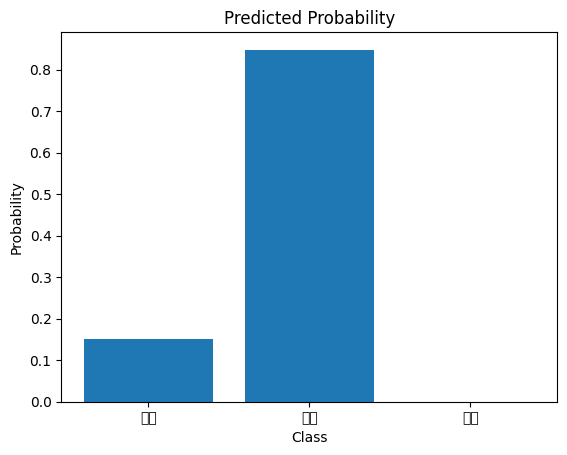

Review: A  black ly  comic  tale  of  a  down - tro dden   priest ,  Na zar in  show cases   the  eco nom y  that  Lu is  Bu nu el  was  able  to  achieve   in  being  able  to  tell  a  deeply  human ist  fab le  with  a  minim um  of  fus s .  As  an  out put  from  his  Mexican   era  of  film  making ,  it  was  an  inva lu able  talent  to  possess ,  with  little  money  and  extremely  tight   sch ed ule s .  Na zar in ,  however ,  surp asse s  many  of  Bu nu el ' s  previous  Mexican   films  in  terms  of  the  acting  ( Francis co  Ra bal  is  excellent ),  narrative  and  theme .< br  />< br  /> The  theme ,  interesting ly ,  is  something  that  was  explore d  again  in  Vir idi ana ,  made  three  years  later  in  Spa in .  It  concern s  the  individual ' s  struggle  for  humanity   and  alt ru ism  amo ngs t  a  society  that  reject s  any  noti on  of  vir tu e .  Fat her  Na zar in ,  however ,  is  portrayed  more  sympathetic ally  than  Sis ter  Vir idi ana .

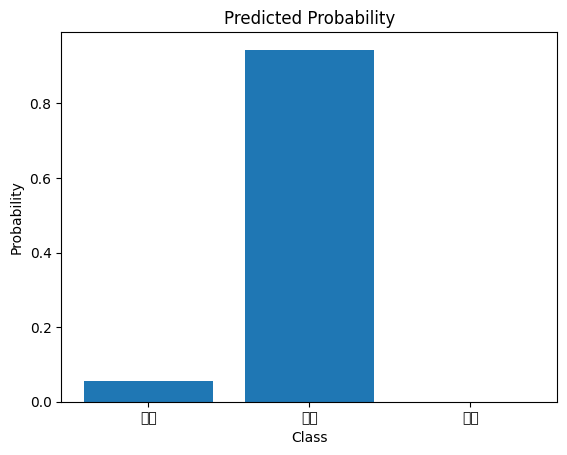

Review: Scar y  Movie  1 - 4 ,  E pic   Movie ,  Da te  Movie ,  Me et  the  Spa rta ns ,  Not  another  Te en  Movie  and  Another  Ga y  Movie .  Mak ing  " Super hero  Movie "  the  elev ent h  in  a  series  that  single  hand ily  ruined  the  parody   genre .  Now  I ' ll  admit  it  I  have  a  soft   spot  for  classics   such  as  Ai rp lan e  and  The  Na ked  Gun   but  you  know  you ' ve  mil ked  a  fran chi se  so  bad  when  you  can  see  the  gags   a  mile   off .  In  fact  the  only  thing  that  might  really  temp   you  into  going  to  see  this  disaster   is  the  incredibly  funny  but  massive   sell - out  Les lie  Neil son .< br  />< br  /> You  can  tell  he  needs  the  money ,  with er  that  or  he  intend s  to  go  down  with  the  ship  like  a  good  Cap ita n  would .  In  no  way  is  he  bringing  down  this  genre  but  hell  he ' s  not  help ing  it .  But  if  I  feel  sorry  for  anybody  in  this  film  its  decent  actor  Dra ke  Bel l  

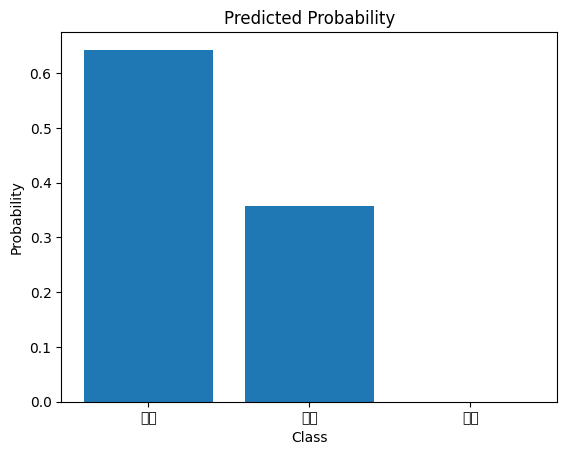

Review: Poo r  Shi rl ey  Mac La ine  tries  hard  to  len d  some  gra vit as  to  this  ma w ki sh ,  gag - indu cing  " feel - good "  movie ,  but  she ' s  tra mpl ed  by  the  run - away  sentimental ity  of  a  film  that ' s  not  the  least  bit  ground ed  in  reality .< br  />< br  /> This  was  directed  by  Cur tis   Han son ?  Did  he  have  a  lo bot om y  since  we  last  heard  from  him ?  Han son  can  do  effective  drama  sprin kle d  with  comedy ,  as  evidence d  by  " Wonder   Boy s ."  So  I  don ' t  know  what  happened  to  him  here .  This  is  the  kind  of  movie  that  doesn ' t  want  to  accept  that  life  is  mess y  and  fus sy ,  and  that  neat ,  ti dy  ending s  ( however  impl aus ible  they  might  be )  might  make  for  a  nice  clos ing  shot ,  but  come  across  as  utterly  phon y  if  the  people  watching  the  film  have  been  through  anything  remotely  like  what  the  characters  in  the  film  go  through .< br  />< br  /> My 

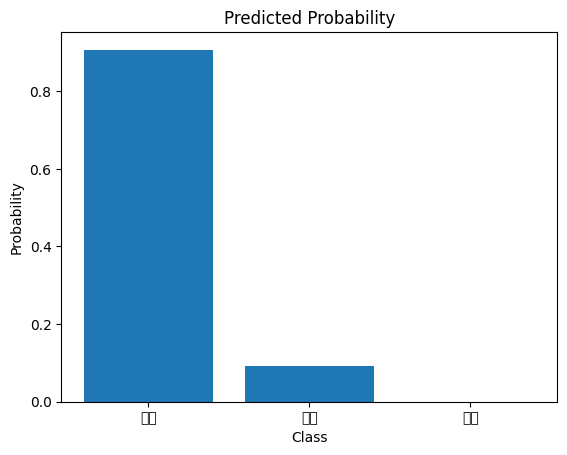

Review: As  a  former  Er as mus   student  I  enjoyed  this  film  very  much .  It  was  so  realistic  and  funny .  It  really  picked  up  the  spirit  that  exist s  among  Er as mus   student s .  I  hope ,  many  other  students  will  follow  this  experience ,  too .  However ,  I  wonder  if  this  movie  is  all  that  interesting  to  watch  for  people  with  no  interna tional  experience .  But  at  least  one  of  my  friends  who  has  never  gone  on  Er as mus   also  enjoyed  it  very  much .  I  give  it  9  out  of  10 .                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

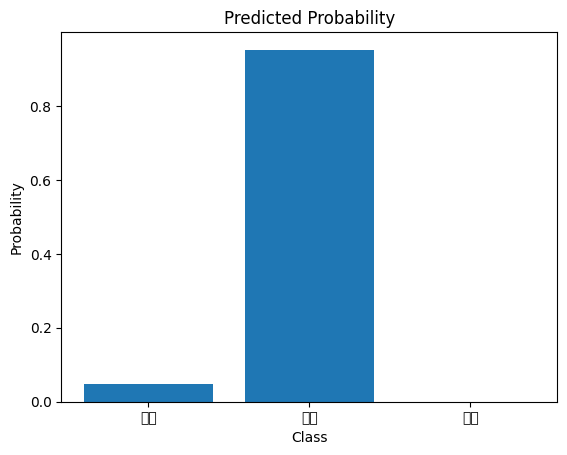

Review: My  God ,  Ryan   Go sli ng  has  made  a  lot  of  deep  characters  in  his  career ,  this  is  one  of  his  wonderful  acting  jobs .  For  me  this  is  a  very  deep  movie ,  needs  a  lot  of  concentrat ion ,  not  because  is  difficult  to  watch ,  just  because  you  understand  it  if  you  put  your  shoe s  in  this  kid ,  even  though  has  everything  and  has  famous  father  that  is  a  writer ,  has  a  deepe r  mind ,  you  don ' t  understand  why  he  kills  this  poor  kid ,  until  you  really  heard  what  he  has  to  say  and  you  start  to  think ,  at  least  to  me ,  that  a  lot  of  things  that  he  says  is  true .  Simp le  kid ,  sweet ,  very  gentle ,  in  a  way  normal  like  any  tee na ge ,  but  inside  of  him  suffer   because  he  start  to  look  at  the  world  in  a  different  way ,  then  you  understand  why  he  did  what  he  did .  I  recommend  this  movie  for  those  who  likes  deep  drama .                      

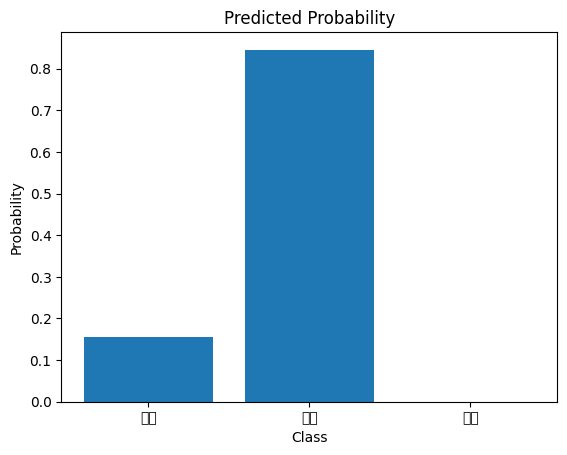

Review: This  film  just  won  the  best  film  award  at  the  Cle vel and  Inter national  Film  Festival .  It ' s  American  title  apparently  is  Au tu mn   Spr ing .  The  acting  is  superb .  The  story  takes  you  into  the  life  of  an  elde rly  man  who  takes  what  life  deals  him  and  spi kes  it  up  a  little  bit .  Ab ette d  by  his  best  friend  ( and  partner   in  not - so - serious  crime )  he  puts  people  on  at  every  opportunity  but  still  often  reveal s  his  heart  of  gold .  His  long suffering  wife  has  come  to  her  wit s  end  and  makes  a  life - changing   decision   which  is  heart breaking  to  watch .  The  resol ution  of  the  story  is  beautiful .                                                                                                                                                                                                                                                                                            

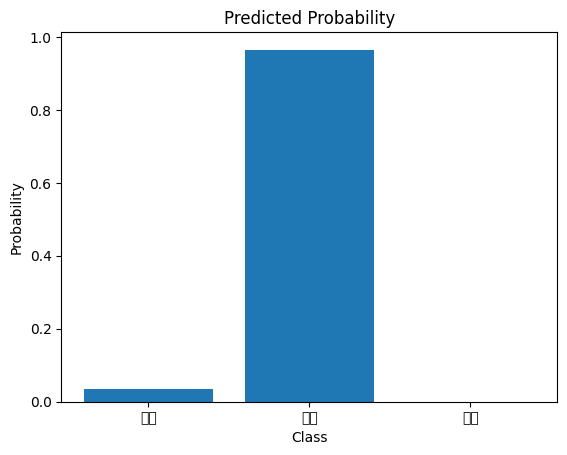

Review: The  cast  for  this  production  of  Ri go lett o  is  excellent .  Edi ta  G rub ero va   sing s  Gi ld a  magnificent ly  and  passion ately .  Luci ano   Pa var ot ti   also  sing s  spl end id ly .  Ver gar a  is  a  fine  Mad dal ena ;  Fe dor a  Barb ier i  is  a  famous  older  singer   who  sing s  the  maid ,  Gi ova nn a .  Wei kl   sing s  Mar ul lo ;  Wi xe ll  sing s  both  Ri go lett o  and  Mont ero ne .  As  Ri go lett o ,  Wi xe ll  is  probably  the  most  convincing  acting  singer   in  this  hard - to - beat  ense mble  of  great  singer s .  Kath lee n  Ku hl man n  in  the  Con tes sa .  All  princip als  are  well - known  and  world - ren own ed .< br  />< br  /> This  is  an  exciting  Ri go lett o  visually   as  well  as  musical ly .< br  />< br  /> I  have  it  on  both  las er  disc   and  DVD .  You  should  have  it  too !                                                                                                                            

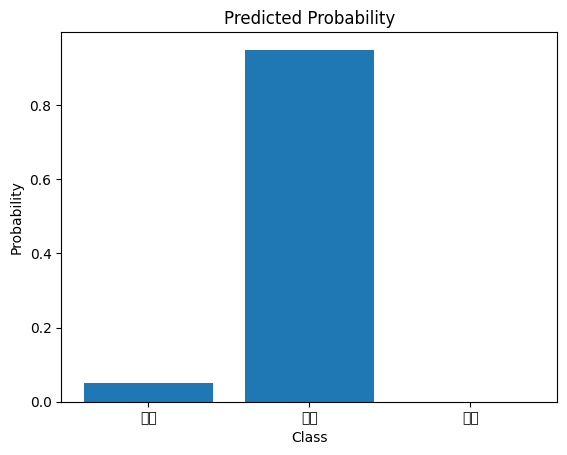

Review: As  long  as  you  keep  in  mind  that  the  production  of  this  movie  was  a  cop yr ight  plo y ,  and  not  intended  as  a  serious  release ,  it  is  actually  surprising  how  not  absolutely  horrible  it  is .  I  even  liked  the  theme  music .< br  />< br  /> And  if  ever  a  flick  cri ed  out  for  a  treatment   by  Joe l  ( or  Mi ke )  and  the  MST 3 K  Bo ts ,  this  is  it !  Watch  this  with  a  bunch  of  smart - ass  wise - crack ers ,  and  you ' re  in  for  a  good  time .  Have   a  bre w ,  butt er  up  some  large  pret zel s ,  and  enjoy .< br  />< br  /> Of  course ,  ob tain ing  a  copy  require s  buy ing  a  boot leg   or  down load ing  it  as  shar ew are ,  but  if  you ' re  here  on  the  IMDb ,  then  you ' re  most  likely  sav vy  enough  to  do  so .  Good  luck .< br  />< br  /> And  look  for  my  favorite  part .... where  Dr .  Doo m  inform s  the  F F  that  they  have  12  hours  to  compl y  with  his  wishe s .... and 

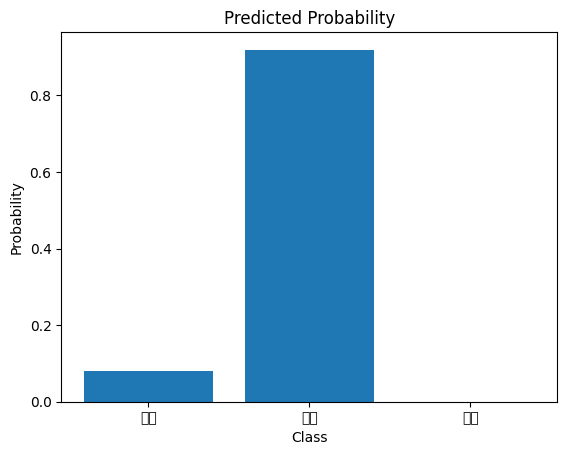

Review: Every  great  once  in  a  while ,  you  stumble   upon  a  movie  that  exce ed s  even  your  wild est  expectation s .  Give n  the  IMDb  rating  of  4 . 0 ,  I  wasn ' t  really  expecting  much  with  The  Bro ther hood  of  Sat an .  I  hope d  that  at  a  minim um  it  might  be  cheesy  fun  like  The  Devil ' s  Rain   or  any  of  the  other  early  70s   similar ly  theme d  Sat ani c  horror  films .  I  couldn ' t '  have  been  more  wrong .  What  I  got  instead  was  an  ambitio us  and  intelligent  film  with  a  cast  I  really  enjoy ed .  Spe aking  in  broad   terms  to  avoid  giving  anything  away ,  the  film ' s  style  and  structure   are  much  more  experiment al  than  the  straight forward  storytell ing  so  prom ine nt  in  the  early  70s .  The  Bro ther hood  of  Sat an  doesn ' t  beat  you  over  the  head  with  plot  points  and  expla nation s .  A  lot  is  left  to  the  viewer  to  fill  in  the  bla nk s .  As  a  viewer ,  you 

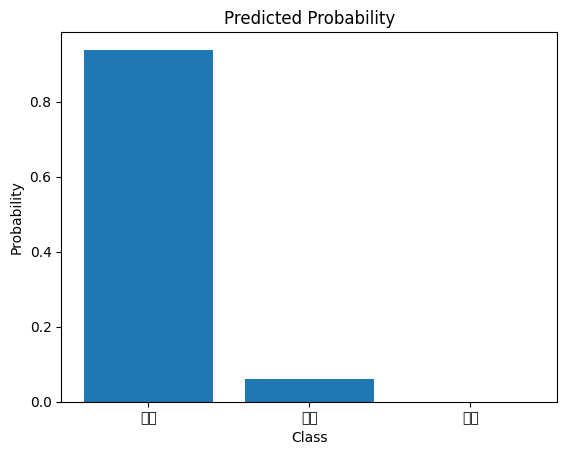

Review: I ' ll  give  it  a  two  because  it  has  a  lot  of  music ,  otherwise  it  would  be  a  one .< br  />< br  /> I  saw  this  movie  for  the  first  time  ton ight  and  it ' s  the  first  " Ro ad "  picture  I ' ve  seen .  I  was  expecting  wa aa aa y  better .  Robert  O sb orn   says  this  is  the  best  of  the  Ro ad  movies .  If  that ' s  true  I  need n ' t  bother  to  see  the  others .  The  best  thing  about  this  movie  is  that  it  has  a  lot  of  songs  in  the  first  half ,  but  that ' s  balance d  out  by  only  one  production  number  with  dancing  in  the  entire  movie .< br  />< br  /> I  didn ' t  like  the  movie .  Ne ith er  Hope   nor  Cro sb y  came  across  all  that  well ,  their  characters  weren ' t  very  charm ing ,  the  movie  was  not  funny  at  all ,  most  of  the  dialog  was  just  lame  fill er ,  there  wasn ' t  much  action ,  there  wasn ' t  much  spect ac le .< br  />< br  /> The  movie  wasn ' t  what  I  exp

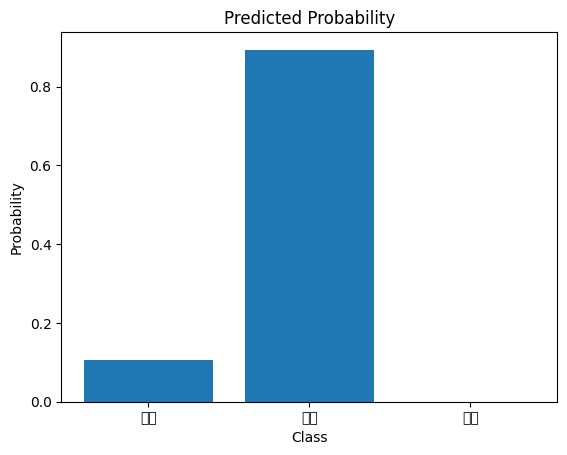

Review: I  kind  of  like  Ba m  Marg era ,  so  I  was  curio us . < br  />< br  /> But  watching  a  home  production  with  somebody  else s  friends  and  family ,  with  a  decent  camera  and  a  sound  guy ,  just  isn ' t  good  film - making . < br  />< br  /> Writ ing ,  direction ,  acting  and  editing  is  ab ys mal   at  best .  But  I  sat  through  half  of  it .  And  why ?< br  />< br  /> This  film  gives  perfect  example s  of  what  not  to  do ,  it  is  a  film  student ' s  dream  of  what  to  avoid  at  every  stage  of  the  process .  Cra m  it  into  film  school  cur ic ul um s  all  over  the  join t !< br  />< br  /> So  than x  Ba m !  Now  I  know  Jack ass  is  for  real  -  cause  you  ain ' t  looking  to  win  an  Oscar ,  dud e : )                                                                                                                                                                                                                           

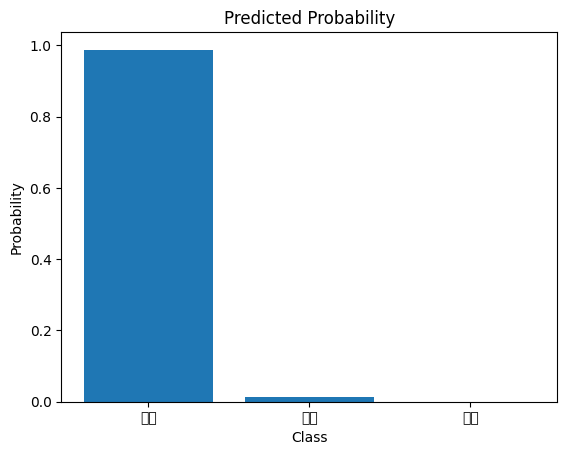

Review: The  plot  line  is  an  expose   of  the  under  bell y  of  American  politics .  While  the  theme  seems  comm on ,  what  " make s "  the  movie  is  the  uncon vent ional   way  the  story  is  tol d .< br  />< br  /> The  characters  are  played  with  convict ion .  You  feel  the  innocen ce  of  the  lead ,  and  his  innocen ce  lost .  The  politic ian  is  the  pri nce  of  dou ble - talk ,  a  real  sna ke .< br  />< br  /> The  camera  work  is  impressi ve .  It  aff ir ms  the  nu ances   of  the  acting  and  dialogue .  Di tto   for  the  music .< br  />< br  /> The  story  uses  a  para ble - style  with  vin get tes  where  the  message  is  filled  with  dou ble - ent end res .  A  very  cann y  strat eg y  by  the  writer / director .  The  tension  in  the  storyline  is  carrie d  through  to  the  last  scenes .< br  />< br  /> The  movie  was  like  a  good  mystery  book .  Some thing  was  " af oo t " ;  you  knew  it  was  bad ;  you  didn ' t  kno

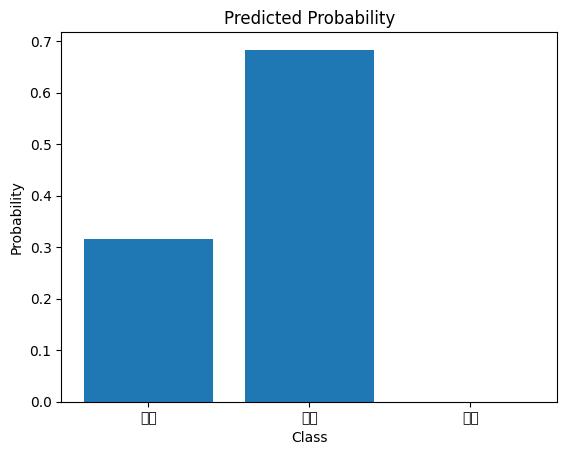

Review: I  saw  this  movie  as  part  of  a  Billy  Gra ham  program .  The  church   I  attend   was  part  of  a  community   wide  out reach  to  present  God  and  Christian ity  to  our  community  ( Hart for d ,  C t .  US A ).  I  was  one  of  the  cou nse lor s  who  helped  attend ee s  ( who  were  invite d  to  come  forward  and  make  whatever  kind  of  religious  profession   they  want ed ... and  to  follow  up  on  them  after  the  movie .  As  suc h ,  it  did  what  it  was  supposed  to  do ,  and  I  personally  found  it  to  be  a  medi um  to  stre ng then  my  faith   in  God . I  also  found  it  to  be  very  help ful  to  those  I  cou nse le d .  I  especially  like  the  work  of  Kim   Dar by  in  this  movie .  And  the  parents  ( the  Win ton s ?)  were  ,  in  a  way ,  a  little  overd raw n .... no  one  says  to  their  child  if  they  think  that  he  or  she  may  be  the  pare nt  of  an  ill eg iti mate  child  something  like  the  Win to

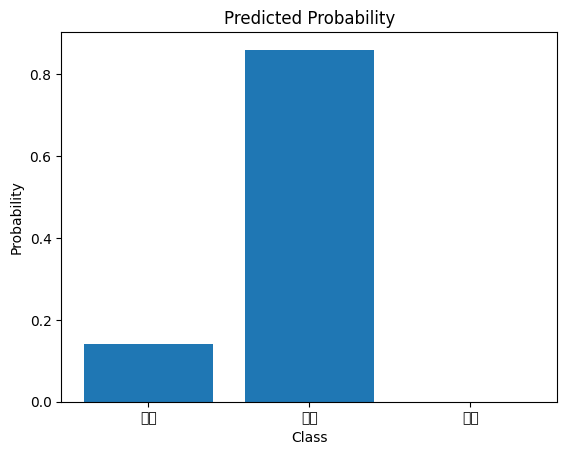

Review: An yth ing  Park   Chan - wo ok   creates  is  gua rante ed  to  be  uni que ,  brilliant ,  and  very  twiste d  at  a  minim um .  Well ,  anything  that  isn ' t  I ' m  a  Cy bor g  at  least .  Park ' s  new est  film  title d  Thi rs t  is  a  vampire  romance - erotic - thriller - dark  comedy - drama    yes ,  that  is  a  lot  of  ad ject ives      inspired  by  the  19 th  century  French  novel  by  Emil e  Zo la  title d  There se  Ra qui n .  Park   creates  a  uni quel y  Korea n ,  and  uni quel y  Park ,  vision  of  the  vampire  myth os  and  asks  the  audience  to  explore   the  dil em ma  of  a  Cath oli c  priest   discover ing  himself  having  a  thir st  for  blood  and  the  moral  and  spirit ual  cris is  that  would  develop .  Park   delivers  on  the  elements  you  would  hope  but  definitely  falls  short  of  masterpiece  quality  like  Ol d boy  or  even  that  of  Lady  Ven gea nce .  Heav ily  blo ated  with  a  narrative  that  often  l

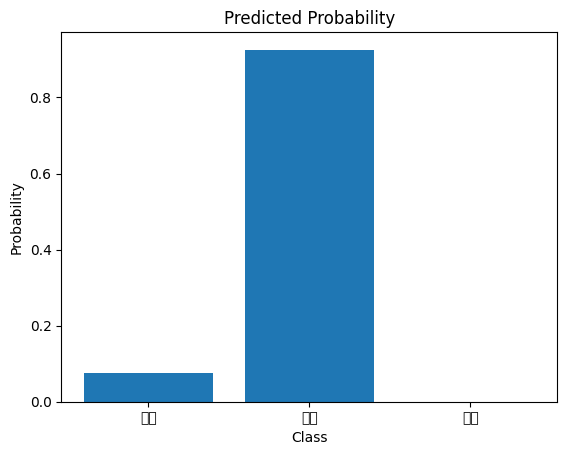

Review: This  film  did  well  at  the  box  offi ce ,  and  the  producers  of  this  mess  thought  the  stars  had  such  good  chemistry  in  this  that  they  cast  them  in  the  much  dark er  screw ball  far ce ,  The  Ga ze bo .  Frank ly ,  I  am  shocked   to  see  all  the  positive  comments  on  this  ludicrous ly  plot ted  unfunny   comedy .  Both  lead  characters  have  the  mat uri ty  of  seven - year - olds   and  are  much  less  interesting  to  spend  time  with .  A  veteran   supporting  cast  including  Fred  Clark ,  Harry  Mor gan ,  and  Eva   Gab or  len d  excellent  support .  And ,  the  beautiful  cinematography  certainly  makes  the  rich  country side  of  Spa in  seem  lus h .  And ,  there  are  four  or  five  truly  funny  scenes  to  go  with  two  wise  scenes  and  a  whole  bunch  of  rec ycl ed  and  unfunny   clu tter .< br  />< br  /> I  cannot  recommend  It  Star ted  With  A  Ki ss .                                                    

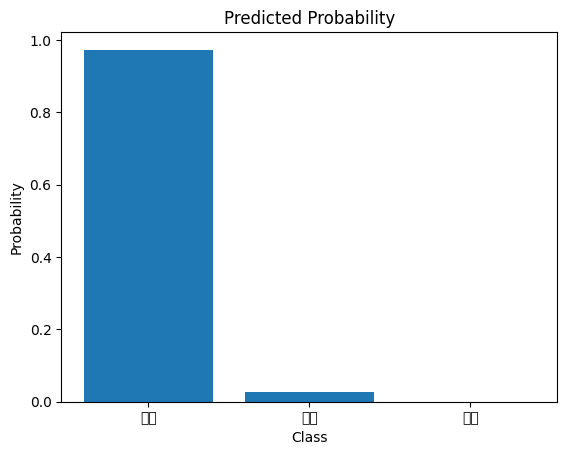

Review: I  own  a  Vid eo   store  with  hundred s  of  document aries .  I  have  seen  load s  of  them  and  love  all  of  the  great  inf o  out  there .  Only  a  small  hand ful  though  even  come  close  to  offer ing  inf o  as  important  as  this  one .  I  have  been  reading  through  other  people s  reviews  of  this  film  and  can ' t  help  but  notice  that  the  main  things  people  are  critic izing  are  irre le van t .  Suc h  as  " It  is  very  one  side d "  Suc h  a  pathetic  criticism ,  every  where  in  society  that  you  look  you  will  see  the  other  side ,  and  if  you  still  need  help  go  to  glo bal public medi a . com . " It  is  the  same  people  over  and  over "  U h  one  might  be  led  to  believe  that  these  people  are  the  expert s ,  so  maybe  they  are  the  best  people  to  interview . " filming  style  is  all  the  same ,  head  shots  with  few  exception s "  If  you  want  flash   and  da zzle   watch  Mich ea l  Moo

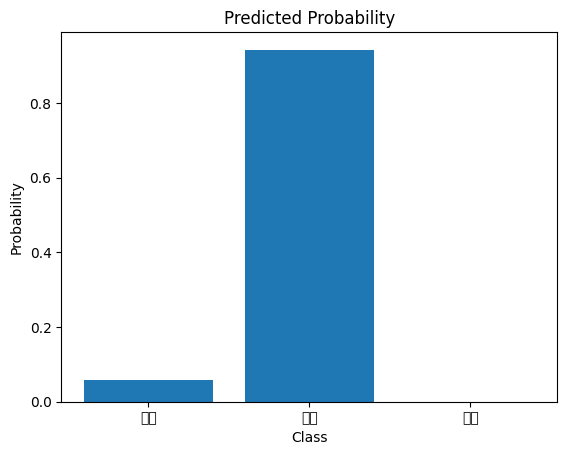

Review: The  dog  can  act ... unfortunately  nobody  else  in  the  cast  of  this  sor did  fa u x  children ' s  film  can .  A  stra y  yet  very  clever  dog  insi nu ates  himself  into  the  lives  of  two  mother less  children ,  much  to  the  cha grin   of  their  bitter   and  col d - hearted  father .  In  what  can  only  be  described  as  Dick ensi an ,  the  evil  widow er  for bid s  his  children  - --  who  may  or  may  not  be  mental ly  challenge d  - --  from  playing  with  Ben ji .  Ne ith er  the  children  nor  Ben ji   ob ey s .  Soo n  the  children  are  kidnapp ed  and  Ben ji   has  to  help  the  police  find  them .  It ' s  only  then  that  the  old  man  realizes  that  Ben ji   is  good ,  not  bad .< br  />< br  /> Tom  Les ter ,  whose  only  previous  acting  experience  appears  to  have  been  playing  the  dim - wit ted  E b  on  GR E EN   AC RE S  plays  one  of  the  kidnapp ers .  So  does  the  regret tab ly  over - uti liz ed  De bor a

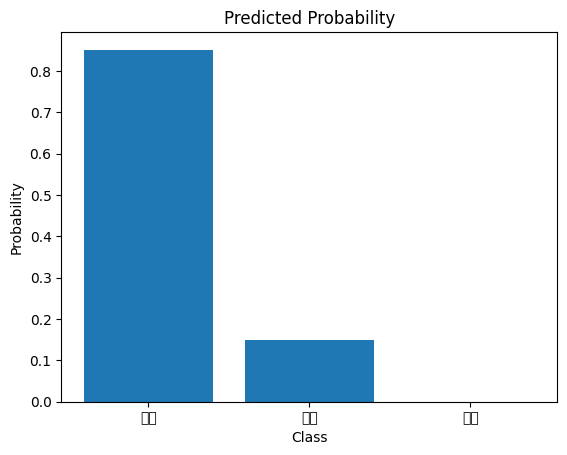

Review: Ser ge i  Ei sens te in ' s  most  famous  movie  has  truly  with stoo d  the  test  of  time .  The  story  of  a  mut in y  abo ard  a  war ship  in  19 0 5  does  have  the  feeling  of  So vie t  propaganda ,  but  does  a  good  job  showing  the  condition s  that  led  to  the  rev ol t .  The  scene  on  the  O des sa   steps   should  remain  sea red  into  anyone ' s  mind .< br  />< br  /> Okay ,  so  " The  Bat tle ship  Po te m kin "  wasn ' t  actually  the  first  movie  to  use  mon tag e ,  but  they  did  a  great  job  with  it  here .  Ce rta in ly  any  film  history  class  should  show  this  movie .  It ' s  a  great  historical  drama  ( although  I  will  admit  that  I  don ' t  know  how  accurate  it  is ).  A  10 / 10 .< br  />< br  /> Oh ,  and  we  should  have  learned  by  now  that  " Po te m kin "  should  be  trans litera ted  as  " Po ty om kin ".                                                                                              

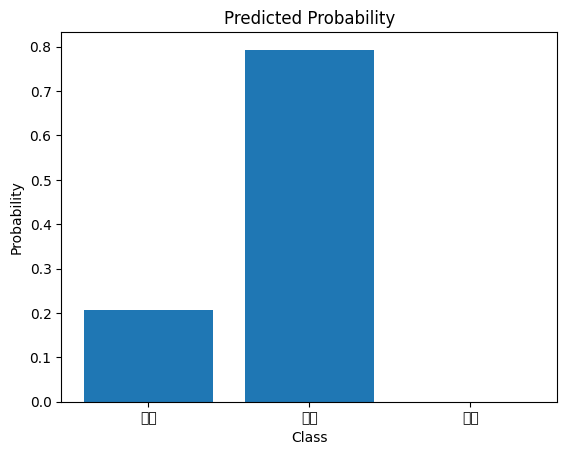

Review: One  would  think  that  since  this  film  has  a  bad  rep   that  I  would  be  exaggerat ing  when  I  say  I  hated  this  film . But  I ' m  am  serious  this  movie  was  just  so  stupid  and  so  unfunny ,  and  such  a  waste  of  time . I  mean  after  the  first  30 ,  I  had  a  major  head ache   and  the  smile  I  had  on  my  face ( that  was  mostly  getting  ready  to  laugh )  was  wearing  off . When  this  film  was  over  I  was  so  glad  and  because  I  had  good  expectations  that  it  would  be  funny  I  was  extremely  disappointed . The  acting  is  not  great ,  the  comedy  moments  are  lame  and  unfunny . Hard ly  anything  is  good  about  this ,  because  I  laughed  at  like  maybe  2  parts . Overall  this  is  so  boring  and  I  can ' t  tell  you  how  awful  this  is ,  I  think  this  could  be  used  as  a  suicide   technique . I  mean  I  don ' t  think  for  some  its  even  watchable . So  my  final  words  on  this  are ,  A V

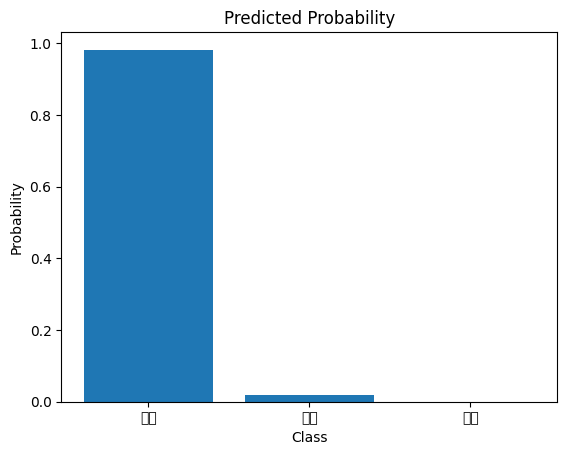

Review: I  really  tri ed ,  but  this  movie  just  didn ' t  work  for  me .  The  action  scenes  were  dull ,  the  acting  was  surprisingly  poor ,  and  some  of  these  characters  were  TO O  stereotypic al  to  even  be  funny .  Pa m  Gri er  tri es ,  but  when  you  have  nothing  to  work  with ,  even  her  considera ble  talent  cannot  prevent   a  disaster .  Even  by  the  standards   of  this  weak  genre ,  this  film  is  pretty  bad .                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

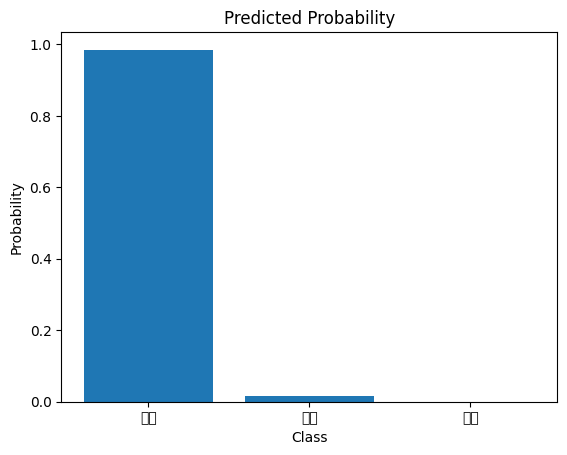

Review: This  classic  has  so  many  great  one - liners   and  unintentional ly  hilarious  scenes  that  I  don ' t  even  know  where  to  start .  If  you  want  advice   on  dat ing ,  its  here .  Just  totally  ignore   the  person  you  want ,  and  then  spo ut  out  classic  lines  like  " Chi cke n ' s  good ... I  like  Chi cke n ",  and  before  you  know  it  you  will  be  having  a  one - night er  in  a  base ment  ( it ' s  a  NI CE   base ment )  with  a  woman  who  is  3 5  years  younger  than  you .  Bro ns on  does  it  all  in  this  film .  He  buy s  a  car  for  no  good  reason  just  so  he  can  murder  two  gang  mem bers ... pay ing  with  " CA SH ". ..... chu nn ng ....  He  buy s  an  ice  cre am ,  simply  because  " this  is  America ,  isn ' t  it ",  and  ends  up  was ting  someone  name d  " the  gig gle r  -  he  laughs  when  he  run s "  just  because  he  sto le  his  camera .  By  the  way ,  this  " gig gle r "  is  so  fast  that  Bro ns

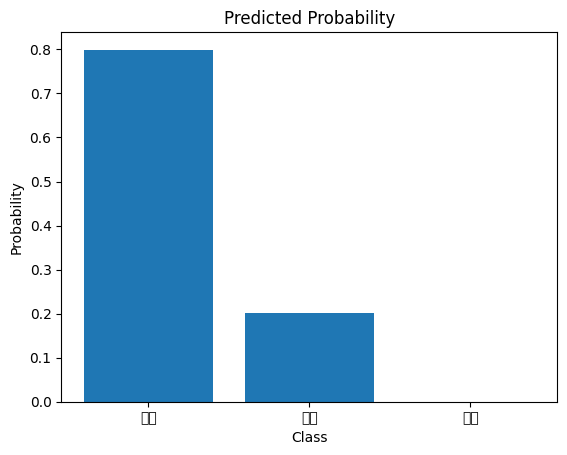

Review: What  to  say  about  this  movie ?  A  married  couple  has  more  then  just  each  other .  After  playing  around  for  some  time  things  gets  more  serious .  A  difficult  choice  has  to  be  made :  continue  the  old  situation  or  start  all  over  by  following  the  heart .  Gue ss  what  happens  at  the  end . < br  />< br  /> This  movie  seems  to  be  very  low  budget .  But  a  good  story  don ' t  have  to  be  expens ive .  It  looks  like  a  play  that  has  been  conve rte d  to  a  movie  only  by  using  several  cheap  locations  ( at  least  very  little  other  people  visi ble )  more  than  just  the  stage ,  in  this  one  the  house .  From  the  first  minute  future  development s  are  clear  as  water .  Nothing  unexpected  happens .  Sometimes   you  may  think  watching  a  soft   porn  movie ,  in  which  case  you  know  in  advance   that  there ' s  no  story . < br  />< br  /> I  find  this  movie  disappointing  so  that ' s  

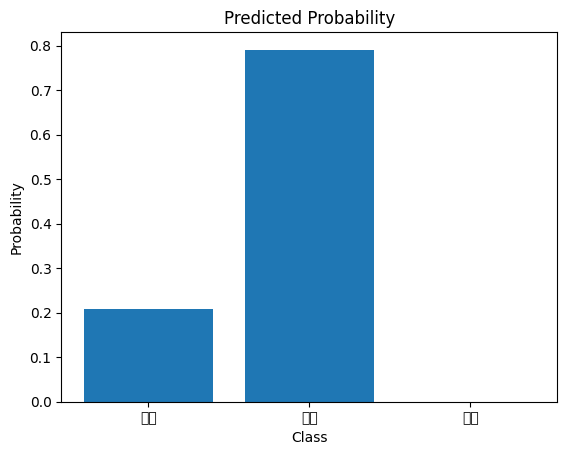

Review: It ' s  so  fak e !  The  plot  seems  like  a  gener ic  adaptation  of  the  average  bla x plo itat ion  film .  The  common  themes  of  bla x plo itat ion  like  racis m ,  op press ion  and  fighting  for  the  integr ity  of  your  community   are  outl ine d  so  simpli stic ally / shallow ly .  And  the  jokes  aren ' t  even  funny !  Dol emi te  does  these  stand  up  mono logue   comedy  routine s  that  are  really  pain ful .  All  the  people  around  him  deliver  this  cann ed  laughter .  Even  the  soundtrack  sounds  like  it ' s  fak in '  the  fun k .  For  far  better  comedy  in  a  bla x plo itat ion  try  " Co ff y "  &  " Friday   Fo ster "  with  Pa m  Gri er .  For  a  more  realistic  bla x  experience  try  " Black  Hea t ".                                                                                                                                                                                                                                  

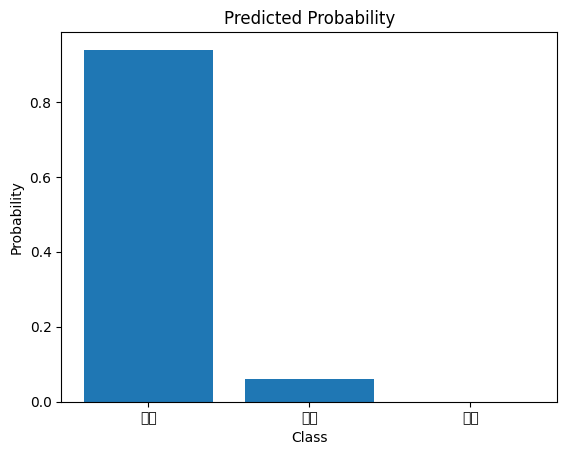

Review: I  first  saw  this  movie  on  I F C .  Which  is  a  great  net work  by  the  way  to  see  underg round  films .  I  watched  this  movie  and  was  thinking  it  was  going  to  be  pure  drama  and  a  story  line  that  doesn ' t  hold  water .  But  it  really  was  a  worth  while  watch .  The  main  character  is  in  such  rough   shape ,  and  you  hate  to  see  him  den y  help ,  but  no  matter  what  you  just  can ' t  hate  him .  His  devot ion  to  The  Beat les  and  John  Len non  is  a  great  meta pho r  for  his  life  and  the  help less ness  he  feel s . < br  />< br  /> The  atmosphere  of  the  film  is  also  great .  At  times ,  you  feel  like  you  can  see  what  he  see s ,  feel  what  he  feels  in  some  situations .  This  movie  does  not  leave  you  wanting  to  know  more ,  or  dis lik ing  a  loo pho le  in  the  plot .  There  are  NO   loo pho les  ( in  my  opinion ).  I  have  always  been  a  fan  of  foreign  films ,  espec

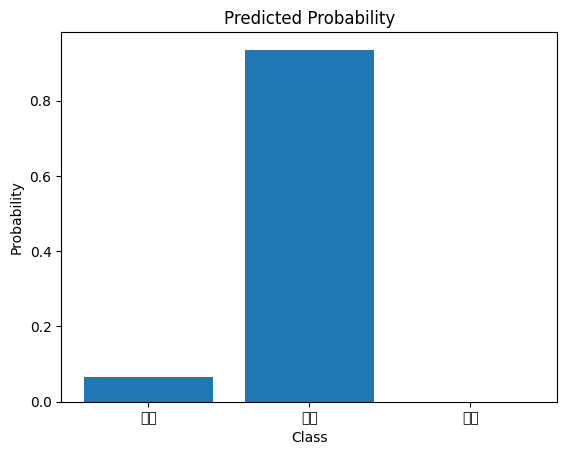

Review: as  a  former  TV  edit or ,  I  can  say  this  is  as  authentic   as  it  get s .  It  even  led  to  Let term an ' s  producer  ( thought  to  be  a  source )  resi gn ing  ( event ual ly )  in  real  life .  Let term an  was  outrage d  ( OK ,  so  one  goof y  thing  is  it  has  him  throw ing  soft ball s  at  a  tire   swi ng  on  his  est ate ;  total  fab rica tion )  but  the  main  information  is  hilarious ly  true ,  from  the  silly  bid ding  war  for  Let term an  once  he  decided  to  leave  N B C  to  Len o ' s  problems  with  an  agent  who  was  not  ready  for  big  time ,  but  who  he  let  run  the  show  ( almost  to  a  disa stro us  ex it )  out  of  his  fame d  loyal ty .  If  any  of  you  kids  don ' t  gras p  the  idea  of  why  Let term an  is  jea lous   to  this  day ,  see  this  tape .                                                                                                                                                         

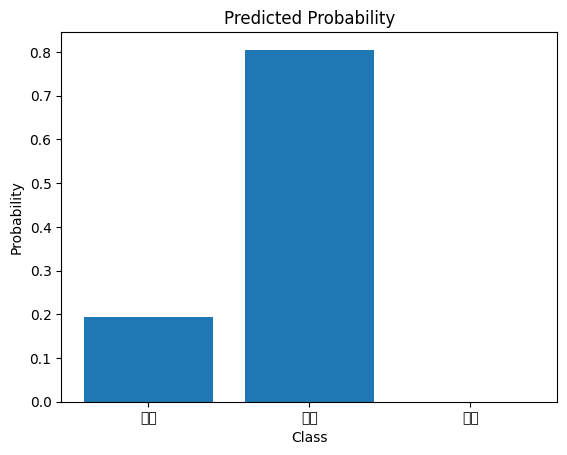

Review: It  is  such  a  shame  when  actors  and  actresses  of  high  quality  get  involved  with  pure  crap ,  probably  because  they  were  offered   a  great  deal  of  money .  Not  one  of  Helen   Mir ren ' s  better  career  move s .  The  acting  of  the  " teens "  is  simply  appa llin g ,  not  helped  by  a  script  that  is  in  parts  simply  inept .< br  />< br  /> Most  of  Kevin  William son ' s  work  is  above  average  box  office  dro ss ,  but  this  is  really  below  par . < br  />< br  /> This  is  the  sort  of  movie  that  you  watch  on  TV  when  there  is  nothing  better  on  and  you  have  had  half  a  bott le  of  win e  to  drink   and  are  waiting  for  the  Pi zz a  to  be  delivered  so  you  can  drink   the  other  half .                                                                                                                                                                                                                             

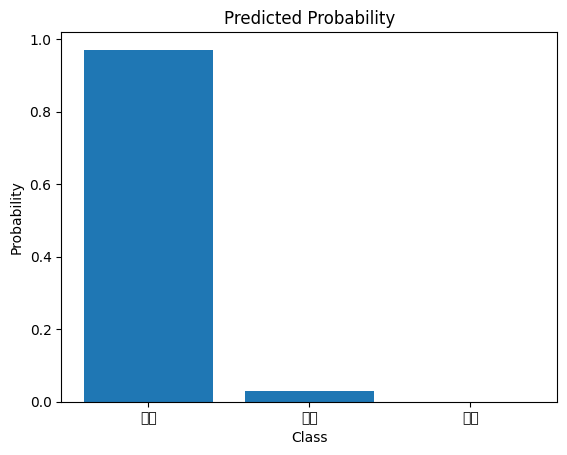

Review: At  it ' s  cor e ,  this  is  a  fairly  typical  revenge  Western ,  heavy  on  the  spa ghe tt i ,  and  if  you  follow  it  as  suc h ,  the  protagonist   comes  through  successful ly  defeat ing  the  main  villain .  However  there ' s  so  much  going  on  that  has  no  bear ing  on  the  story  that  you  have  to  wonder  what  the  film  makers  were  thinking  about .  I ' m  refer ring  to  stuff  like  the  way  Miss  Ros ie ' s  singing  number  just  pop s  up  out  of  nowhere  and  the  box ing  match  in  the  middle  of  town .  OK ,  they  have  a  loose  connection  to  the  influence   villain  Mas h  Fla na gan  has ,  but  why  all  of  a  sudden   does  he  turn  up  with  an  ali as  -  Mr .  Don ova n .< br  />< br  /> On  the  fli p  side ,  I  thought  it  was  pretty  inn ova tive  how  the  camera  shot  showing  the  wound ed  Wall ach ' s  view  of  the  trai l  might  have  been  filmed  by  someone  with  an  actual  bullet   in  his  shou

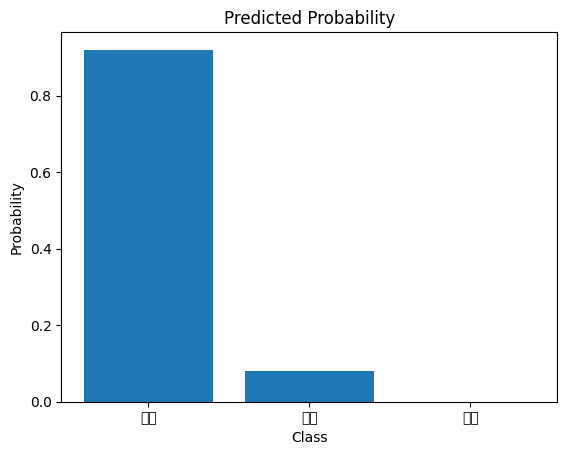

Review: I  gave  Sou l  Plan e  the  benefi t  of  the  doubt  and  thought  there  would  actually  be  something  of  comedic  value  in  it .  Im   not  black ,  but  that  does  not  mean  I  cant  appreciate  black  comedy .  I  know  that  because  I  happen  to  enjoy  watching  the  Way ans  Bros ,  Good  Time s  and  other  series . < br  />< br  /> I ' ve  seen  crap  movies  and  Im   not  easily  rep uls ed .  As  for  Sou l  Plan e ,  I  didn ' t  even  bother  finish ing  it .  Don ' t  know  if  they  managed  to  land  the  plane  and  I  couldn ' t  care  less .  It  would  be  unfa ir  to  say  I  didn ' t  find  some  parts  funny  as  I  did  laugh ,  but  I  also  laugh  at  You tu be  video s  of  sk ate board ers  falling  on  their  nut s  so  that  doesn ' t  say  much .  The  men  in  the  movie  were  like  a  bunch  of  how ling  hor ny  hy ena s  in  mati ng  season  looking  to  " get  some "  whenever  and  where  ever  possible .  And  we  wonder  why  a

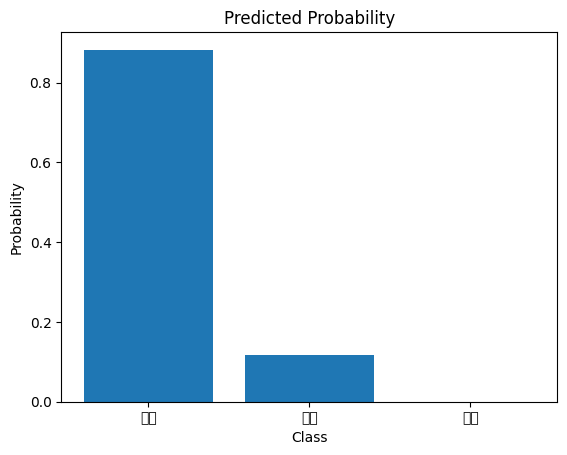

Review: Whe never  Hay a o  Mi ya za ki  does  the  " tri - fe ct a ,"  ( writ es ,  direct s ,  and  ani mates   a  movie )  he  makes  a  classic  film  for  the  ages .  He  has  done  it  again  with  Ga ke  no  ue  no  Po ny o .< br  />< br  /> The  story  is  about  a  girl  fish   who  is  kept  on  a  very  tight   leas h  along  with  her  younger  sister s  by  her  father ,  a  bitter   ex - human  wi zard   named  Fu ji mot o .  The  fish   escape s  from  her  father  and  ride s  a  je lly fish   to  sho re ,  where  she  is  caught  up  in  a  dre d ging  operati on  and  finds  herself  stuck  in  a  bott le .  This  underw ater   sequence  must  be  one  of  the  most  ela borat ely  drawn  animated  scenes  ever  under taken  and  stands  on  its  own  as  a  reason  to  search  out  the  theatrical  release .  Mi ya za ki ,  who  shows  no  fear  of  having  a  bus y  scene ,  has  out done  himself .  There  were  literally  hundred s  of  individual ly - drawn  sea

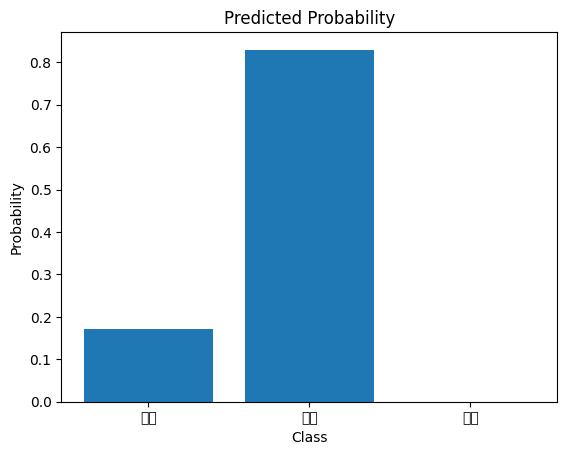

Review: Well ,  I  have  to  disa gree   with  Leon ard  Mal tin   on  this  animated  short .  He  loves  it  and  claim ed  it  was  hilarious .  I  enjoyed  it  but  didn ' t  see  any  humor .  He  doesn ' t  even  like  ho cke y  or  know  anything  about  it ,  and  still  loved  the  story .  Liv ing  right  across  the  border   from  Can ada ,  I  have  watched  ho cke y  for  50  years  both  there  and  in  Bu ff alo .... but  I  didn ' t  think  much  of  this  cartoon .  Oh ,  it  was  interesting  and  I  know  what  would  happen  if  you  wor e  a  Tor onto  je rse y  up  in  the  Q ue bec   area  -  disaster !  That  especially  holds  true  in  the  glo ry  years  of  Les   Can adi ans .  However ,  that  doesn ' t  make  the  story  funny . < br  />< br  /> Back   in  the  1950 s ,  everyone  in  the  Q ue bec   provi nces   id oli zed  the  Mont real  Can adi ans  and  their  star  player ,  Mau ric e  Richard ,  and  everyone  wanted  to  be  like  him .  When  his

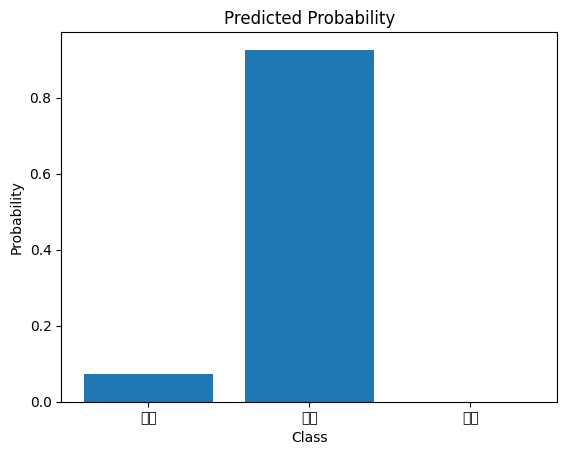

Review: I  saw  this  movie  at  a  screen er  and  its  the  best  movie  I  have  seen  in  a  loo oon g  time .  I  loved  it !!!!   James  Franc o  is  so oo   hot  and  him  and  Si en na  Mille r  make  the  perfect  couple .  I  don ' t  want  to  give  away  what  happens  but  they  play  a  pair  of  new ly we ds  who  go  off  on  their  hon ey moo n  to  Ni ag ara   Fal ls  and  some  pretty  wild  stuff  happens  along  the  way .... The  movie  is  really  really  funny  and  sad  and  original .  I  can ' t  even  say  what  it  reminded  me  of ,  but  go  see  it !  I  cri ed  so  hard  but  really  loved  it  and  wanna   see  it  again  as  soon  as  it  comes  out !  My  friends  cri ed  too .  I  hope  it  comes  out  soon  -  does  anyone  know  whe n ?  i  would  really  go  see  it  if  i  were  you                                                                                                                                                                      

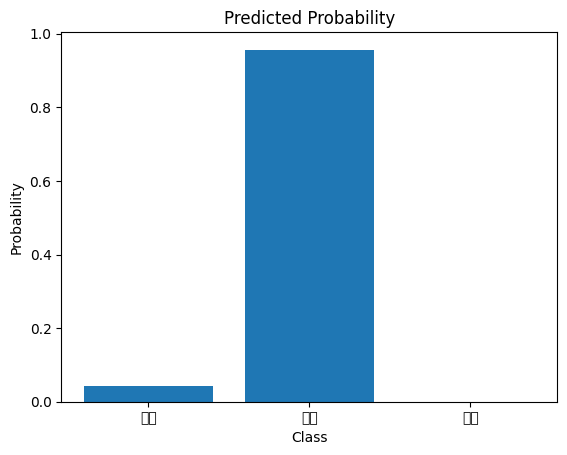

Review: You  know  the  saying  " Cur io sity   Kill ed  The  Cat "?   Well ,  I  have  heard  so  much  about  this  film ,  from  a  mag azi ne  that  named  this  one  of  the  most  shocking  movies  of  all  time ,  my  100 1  movies  you  must  see  before  you  die ,  my  sister  who  saw  this  at  a  film  festival ,  and  the  I  love  the  70 ' s  show  on  V H 1 .  I  just  had  to  see  this  movie  since  it  was  named  the  gross est  movie  of  all  time ,  and  well ,  after  viewing  this  film  last  night ,  I  have  to  say  that  it  really  did  live  up  to  it ' s  title .  My  God ,  this  movie  was  so  weird !  I  thought  I  really  did  see  it  all  with  some  of  the  sick est  movies  and  TV  shows  I ' ve  seen ,  some  things  I  guess  will  always  still  feel  like  a  shock .< br  />< br  /> Well ,  Ba bs  Johnson ,  aka   Di vin e ,  has  been  named  the  fil thi est  person  alive  and  a  jea lous   couple  named  the  Mar bles   are  comp

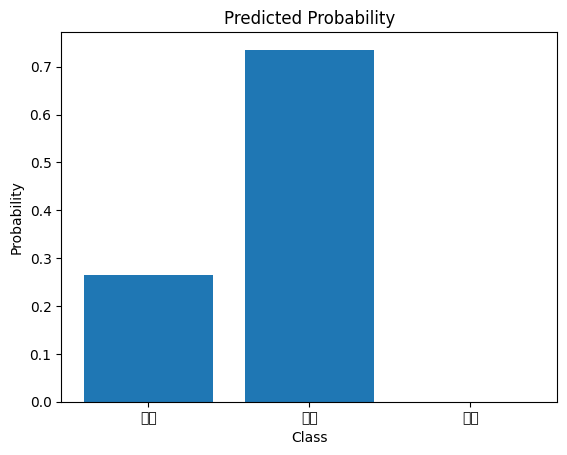

Review: Finally !  Other  people  who  have  actually  seen  this  show !  It  is  the  funniest  anime   I  have  ever  seen ,  but  most  people  have  even  heard  about  it .  It  is  just  hilarious .  ' And  so  kin tar o  will  continue  to  ride  his  tru sty   bik e  and  maybe  one  day ,  he  will  save  the  world .... or  maybe  not '.  tar e  just  some  classic  bits  in  it  ' and  so  he  will  ride  onto  the  next  city ... because  he  has  no  choice  since  his  bra kes  are  broke n  ( study  study  stud y ) '  And  some  of  the  lesson s  that  he  writ es  down  in  his  little  note book , ' today  i  had  a  very  educat ional   experience .  I  tried  to  look  back wards ,  but  unfortunately  I  was  already  looking  that  way .  It  hurt .  Tod ay s  lesson ,  the  human  head  cannot  turn  3 60   degree s . '                                                                                                                                                 

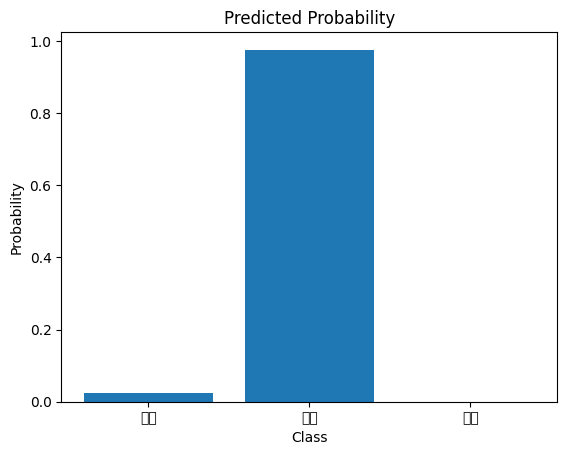

Review: The  premise  is  interesting  and  the  cast  does  the  best  it  can ,  but  the  script  and  the  director ial  effort  are  so  poor  that  it  is  not  surprising  that  this  film  was  bur ied -- which  is  fitt ing  given  the  screenplay .  As  I  watched  this ,  I  could  not  decide  which  was  worse ,  the  screenplay ,  or  the  directing .  The  actors  are  over  the  top ,  the  art  direction  looks  like  a  Disney  movie ,  the  music  is  contrived ,  and  the  sen time nt  so  sweet  that  it  gives  viewers  cav iti es .  It ' s  a  bad  attempt  to  imitat e  " FO ur  We dding s  And  A  fun era l ".  If  one  wants  to  watch  comedy  that  is  as  flat  as  a  pan ca ke  and  how  poor  direction  can  turn  a  story  into  cav ity  sweet ness ,  this  is  a  good  one  to  watch .                                                                                                                                                                           

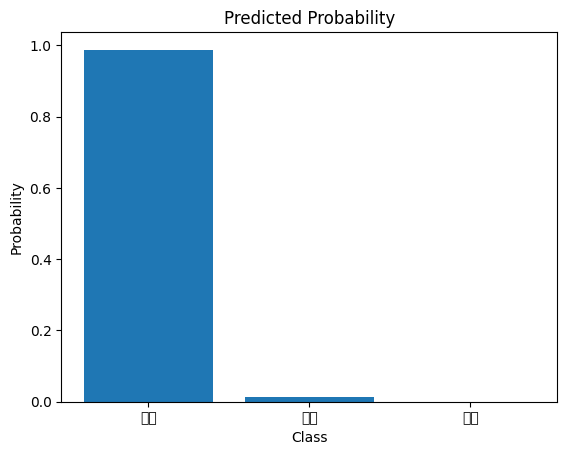

Review: The  Andrew   Davi es  adaptation  of  the  Sarah   Water s '  novel  was  excellent .  The  characters  of  Na n  and  and  Ki tty  were  superb ly  portrayed  by  Ra cha el  Sti rl ing  and  Kell ey  Haw es  respect ive ly .  The  whole  series  was  a  total  joy  to  watch .  It  caught  the  imagination   of  everyone  across  the  board ,  whether  straight  or  ga y .  I  wish  there  could  be  a  sequel !                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

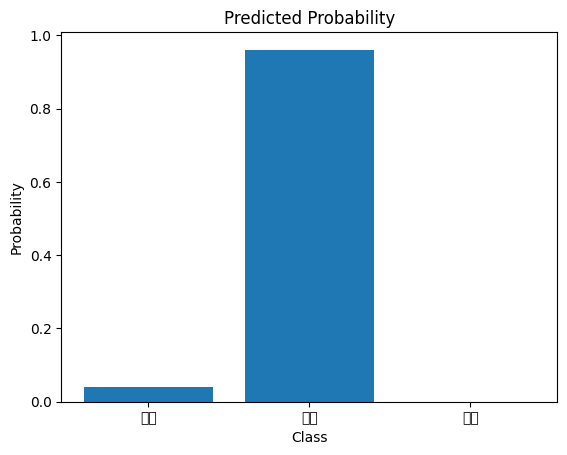

Review: I  just  check ed  out  North anger   Ab be y  from  the  local  libr ary ,  and  wasn ' t  expecting  much .  Im ag ine  my  su pris e  at  this  got hic   treat !  North anger   Ab be y  is  one  of  the  most  eeri e  places  that  you  have  ever  seen ,  with  empty  pass age ways  and  orn ate  room s  full  of  hidden  secret s .  The  glo ry  of  the  movie  is  that  it  never  reveal s  all :  your  imagination   runs  free ,  running  with  the  imagination   of  the  main  character ,  one  Kath rin e  M .  She  is  a  girl  of  wild  imagination s ,  a  read er  of  got hic   fantasy  that  she  brings  into  her  ( and  our )  real  world .< br  />< br  /> If  I  were  to  use  one  word  to  describe  this  excellent  movie ,  it  would  be  surreal istic .  Dream s  are  wo ven  throughout  the  movie ,  enh anc ing  the  mood .  Sometimes ,  it  is  hard  to  tell  what  is  real  and  what  is  not ;  this  is  intention al ,  I  believe .< br  />< br  /> At m

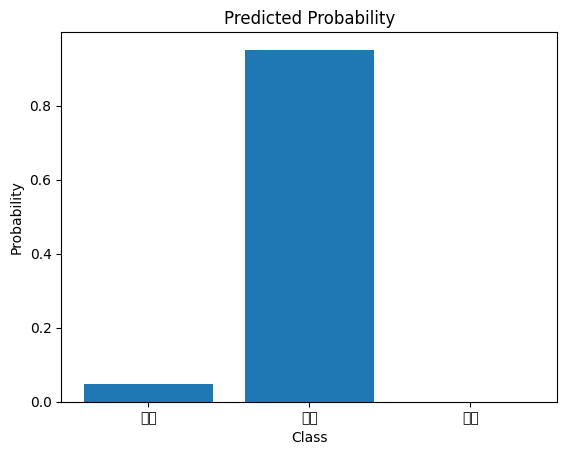

Review: Chu pa cab ra :  Dark  Water s  has  to  rank   as  one  of  the  most  insi pid ly  moro nic  movies  ever  made .  I  had  expected  at  least  some  pass able  entertainment  because  John  Rh ys  Davi es  was  involved ,  and  after  seeing  this  movie ,  I  can  honestly  say  I  lower ed  my  opinion  of  Mr .  Davi es  subs tant ial ly .< br  />< br  /> Why ?  The  acting  is  incredibly  poor .  An  excellent  actor  like  Davi es  should  have  demand ed  more  from  the  cast  and  the  director .  It  was  painfully  obvious  that  Mr .  Davi es  was  just  clo ck - watching  and  hoping  the  check  would  not  bou nce .  To  say  that  he  just  showed  up  would  be  an  underst ate ment .  But  at  least  he  did  show  up .  The  rest  of  the  cast  looks  like  they  mail ed  it  in  from  their  respect ive  jobs   at  the  various  Lo s  Angel es  rest aura nts  where  they  work  as  wait ers .  Tal k  about  a  cast  of  unk now ns !  This  is  the  kind 

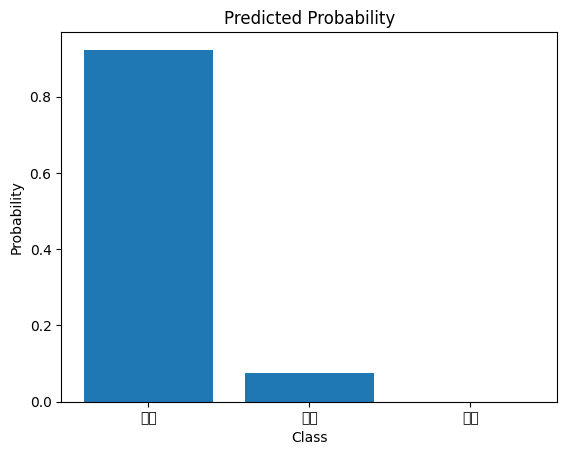

Review: Just  saw  this  film  at  the  Fan tas y  Film fest   BE R LI N .  i  am  not  impres sed .< br  />< br  /> As  far  as  the  story  goe s .  Too  girlfriend s  return  from  their  Me xico   vac ation .  While  waiting  for  their  lu gg age  they  get  to  know  a  couple  of  boy s ,  who  then  take  the  last  and  of  course  wrong  shut tle   bus   to  the  city .  On  board  is  also  one  other  older  man ,  so  weird ly  portrayed  that  you  instant ly  guess  that  he  is  one  of  the  bad  guys .  The  other  one  is  the  driver .< br  />< br  /> The  shut tle   takes  them  into  industr ial  waste land  and  then  one  after  the  other  goes  done ,  a  little  blood ,  some  cut  of  ext rem iti es ,  some  violence ,  mostly  playing  with  the  fear  of  the  girls  In  the  end  after  some  ups  and  down s ,  here s  and  there ' s ,  some  not  too  new  scary  moments ,  everyone  is  dead  but  the  driver   and  the  girls .  the  girls  end  up  i

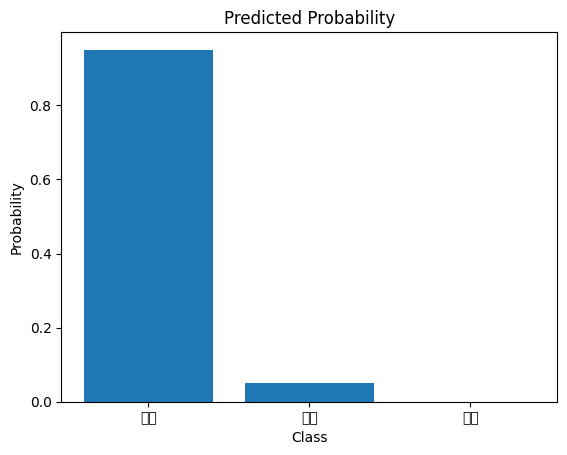

Review: I  watched  this  movie  about  six  years  ago  and  I  recently  did  so  again .  If  I  remember  correct ly  I  did  not  like  it  at  all  the  first  time  and  I  appreciated   it  slightly  more  this  second  time .< br  />< br  /> This  movie  is  obviously  on  a  big  budget .  The  effects  are  mostly  top  notch  ( except  for  one  or  two  " impa ct s ")  and  the  cast  is  impressi ve .  However ,  there  are  some  elements  that  destroy  the  overall  impression  of  the  show .< br  />< br  /> First ly ,  who ever  decided  that  Peter  Sto rma re  should  act  as  a  crazy  Russian  ast ron aut   should  be  fire d .  Being  a  Swe de  and  a  fan  of  Pete r ,  I ' m  pretty  sure  he  can  play  a  Russian  character  well .  But  his  performance  in  this  case  is  plain  stupid ,  both  with  respect  the  lines  ut ter ed  and  the  acting .  So ...  something  must  be  wrong  with  the  script .  I ' d  like  to  see  Peter  as  a  professiona

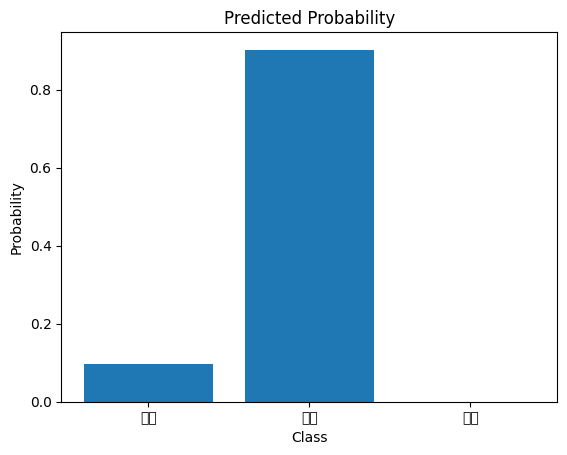

Review: This  game  is  not  exactly  the  best  N 6 4  game  ever .  Sure ,  it ' s  good ,  but  only  when  there ' s  4  player s .  Without  4  player s ,  the  only  fun  thing  to  do  is  take  remo te  mine s  and  see  how  many  people  you  can  kil l .  But  half  of  this  game  are  levels   where  you  have  to  save  Nata ly a ,  so  you ' ll  have  to  limit   your  use  of  remo te  mine s  in  those  levels ,  and  that  gets  quite  boring .  The  graphic s  don ' t  exactly  reach  the  level  of  Super   Mari o  6 4  or  even  Mari o  Kar t  6 4 .  And  if  you ' re  talking  a  great  multi player   in  a  1 st - person  shoot er ,  you ' ll  have  to  go  with  Per fe ct  Dark .  At  least  you  can  play  " multi player "  by  yourself .                                                                                                                                                                                                                                   

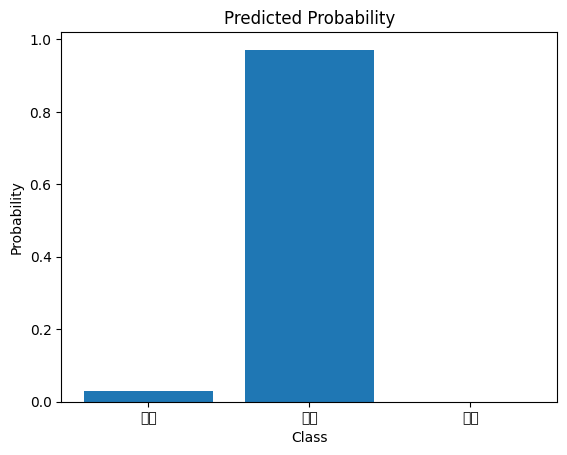

Review: I  have  been  collecti ng  Iron   Man  comic s  since  the  early  70s   and  always  enjoyed  the  character  who  is  far  far  from  the  average  clean   cut  hero  and  his  many  and  varie d  enem ies .  There  have  been  no  less  than  three  attempts  at  an  animated  series  for  Iron   Man  and  only  the  original  and  part  of  the  second  have  ever  done  the  character  just ice .  So  I  was  somewhat  hope ful  that  this  new est  version  would  be  good .  Boy   was  I  wrong !  The  DVD  art  is  VERY  mis leading  and  presents  an  image  that  is  not  the  movie .  Fi st  off  the  good ,  what  little  there  is ...  The  art  and  animation  are  well  drawn  and  the  writing  and  dialog  are  generally  good ,  though  with  notabl e  exception s .  Char acter   voices   are  very  well  select ed  and  each  character  is  distinct ive  and  well  acted .  Now  for  the  bad ...  Unfortunately  the  writers  op ted  to  totally  screw   aro

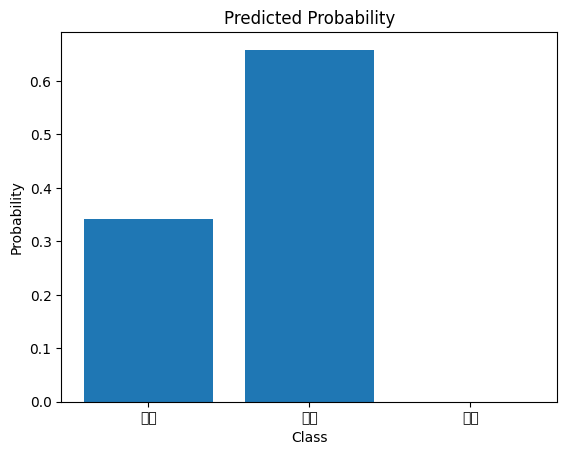

Review: I  saw  House  Part y  1 - 3  and  I  loved  them  but  this  one  wasn ' t  funny  at  all . First  it  can ' t  be  a  House  Part y  movie  without  Kid   n ' Play   right ?  This  one  sucks   and  it  was  more  like  a  black  version  of  Fer ris   Bu elle r ' s  Day   Off   than  a  House  Part y  movie . Second   who  the  heck   is  John - John ? These  new  character ' s  can ' t  even  compare  to  the  ones  from  the  other  three  movies . Now  i  know  why  they  put  it  straight  to  video . It  has  horrible  music ,  weak  plot ,  unt ale nted  actors , and  no  hilarious  jokes  at  all . My  advice , watch  this  movie  at  night  only  if  you  can ' t  get  to  sleep . They  should  have  ended  the  series  after  House  Part y  3  since  Kid ' n ' Play   separate d  after  that  one . I  hate  this  one  am  glad  my  local  video  store  doesn ' t  have  this  film  and  never  want  to  buy  it  or  want  to  see  it  on  Come dy  Cent ral  either . 

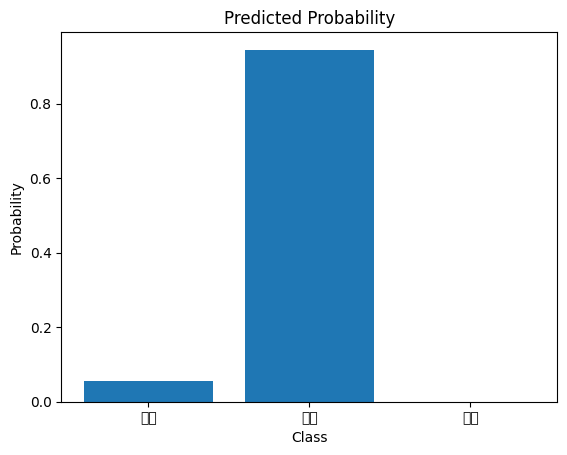

Review: I  find  it  sad  that  just  because  Edward   Nor ton  did  not  want  to  be  in  the  film  or  have  anything  to  do  with  it ,  people  auto mati cally  think  the  movie  sucks   without  even  watching  it  or  giving  it  a  chance .  I  really  hope  Nor ton  did  not  do  this .  He  is  a  fine  actor  and  all  but  he  scared  people  away  from  a  decent  movie .< br  />< br  /> I  found  it  entertaining .  It  wasn ' t  mind  blow ing  or  anything  with  crazy  special  effects ,  but  it  was  not  a  bad .  It  was  fun  to  watch .  But  ye a ,  definitely  not  a  bad / horrible  movie .< br  />< br  /> 7 / 10                                                                                                                                                                                                                                                                                                                                                              

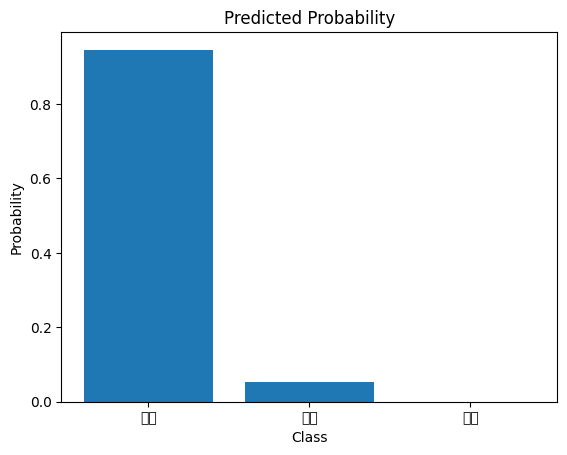

Review: Simp ly  miserabl e  Lan a  Turn er - E zi o  Pin za   vehicle .  Pin za   had  a  beautiful  voice  but  he  rarely  uses  it  in  a  film  that  reminded  me  of  " The  Stu dent  Prince "  with  adult s .  Pin za   is  no  leading  man  either .  He  looks  like  an  elde rly  man  ready  to  colle ct  social  securi ty  and  go  fish ing .< br  />< br  /> The  plot  is  extremely  thin  and  the  supporting  cast  of  Barry   Sullivan ,  Mar jor ie  Ma ine  and  De bbi e  Re yn olds   are  given  so  little  to  do .  Sir   Ce dri c  Hard wick e  comes  in  at  the  end  to  ann ounce   that  our  King  E zi o  had  better  return  to  his  people .  As  far  as  I ' m  concerned ,  the  fast er  the  better .  Is  that  Lan a  Turn er  really  singing  with  Pin za ?  Not  bad  if  it  is  her .  The  picture  would  also  remind   me  in  a  way  of  the  1960   movie  " The  Prince   and  the  Show girl "  with  Mari lyn   Mon ro e  and  Laure nce  Oliv ier .            

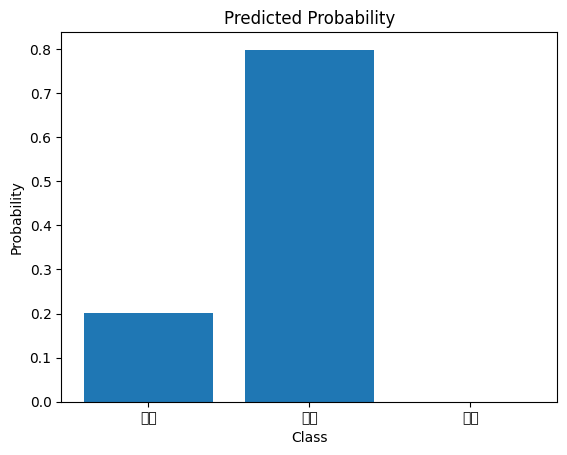

Review: Eg ad s .< br  />< br  /> I  used  to  think  Ke ann u  Ree ves  was  the  worst  actor  in  Hollywood .  I  not  so  sure  anymore ,  Wil ly  gives  Ke ann u  some  stif f  competi tion  with  his  " I ' m  made  of  plas ter "  performance  in  this  movie .< br  />< br  /> Com bin e  that  with  the  fact  that  there  is  almost  no  plot ,  and  not  a  single  likable  character ,  and  it ' s  pretty  hard  to  recommend  this  tur key .< br  />< br  /> Nata sha   tries  her  best ,  but  even  Julia   Roberts   couldn ' t  save  this  flick  from  obsc uri ty .< br  />< br  /> Avoid  it  unless  it ' s  really  late  and  there ' s  nothing  else  on .  - Oh  heck ,  in  that  case  just  read  a  book .                                                                                                                                                                                                                                                                               

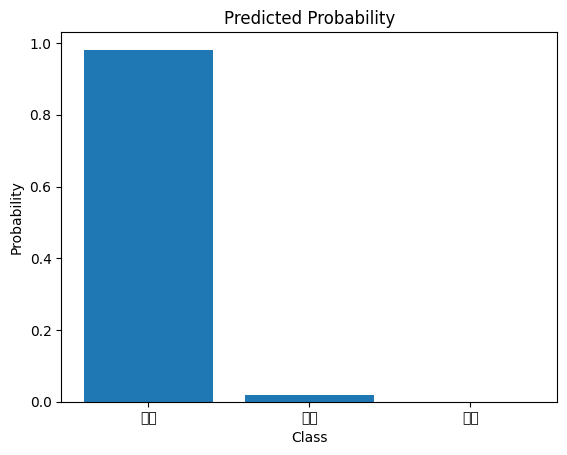

Review: The  mission   to  see  the  movie  " The  Ca ve "  was  a  dream  of  a  friend  of  mine   after  witness ing  the  highly  dramatic  trailer ,  full  of  flash es  of  a  creature  lur king  in  a  cav e ,  some  young  cav e  diver s ,  and  not  much  else .  It ' s  too  bad  that  the  movie  didn ' t  change  much  more  than  the  trailer  did .< br  />< br  /> The  imme diat e  all ure  of  a  movie  like  this  is  the  creat ure .  What ' s  he  going  to  look  like ?  Why  does  he  live  in  a  cav e ?  How  is  this  one  supposed  to  be  different  from  the  other  creatures   we ' ve  been  shown  in  movies  like  Ali en  and  Pre dat or  and  the  Re lic ?  The  cav e  " demon s "  do  not  look  far  from  the  ske let al  creature  in  Ali en :  Res ur rec tion  and  even  has  the  sight  of  Pre dat or .  Sha me  that ' s  a  total  rip off ...< br  />< br  /> Well ,  let ' s  look  at  the  plot :  very  confusing  and  jump s  to  more  and  more  to

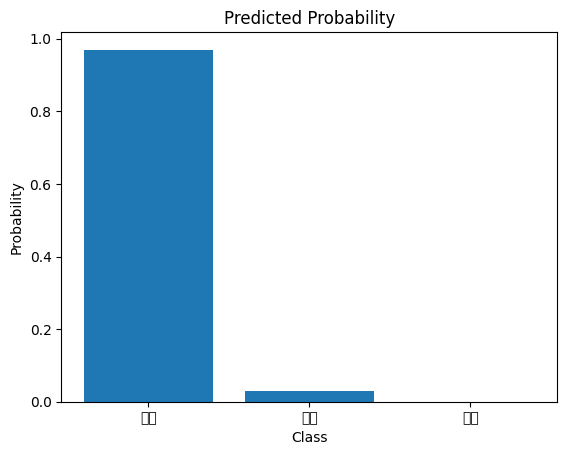

Review: I  cannot  understand  the  need  to  jump  back wards   and  forward s  to  scene  set ,  and  pa d  out  the  plot .  Show ing  that  someone  has  a  skill   right  before  they  use  it ,  I  believe ,  is  offend ing  our  intelligen ce .  It ' s  starting  to  feel  a  little  contrived ,  and  as  though  they  are  making  up  for  being  so  vague   for  the  first  three  series .  A  little  disappointing  this  episode .< br  />< br  /> Fur ther more ,  using  past  quirk s ,  like  Lo cke ' s  ability  to  know  when  a  storm   is  ending ,  is  frankly   insult ing ...  are  we  supposed  to  oo h  and  arr ,  or  laugh  at  the  soft er  side  of  Lo cke ?< br  />< br  /> This  episode  was  all  over  the  place .                                                                                                                                                                                                                                                            

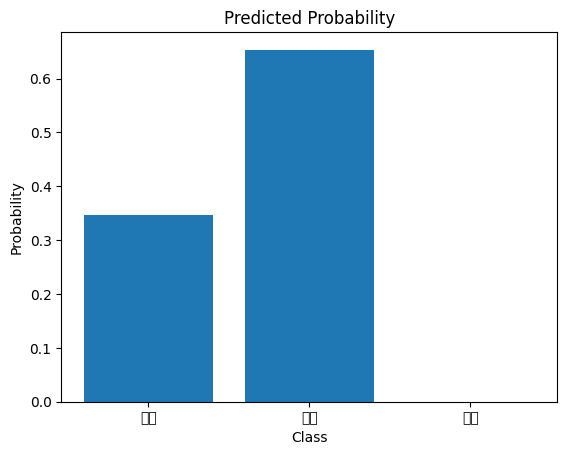

Review: How  to  round  up  every  possible  cliché  and  stereo type  exist ing  in  the  genre  of  horror  and  then  subs equent ly  stuff  them  into  one  massive ly  lousy  movie ?  The  answer : " Camp   Blood ".  This  is  amateurish   slasher  nonsense   made  on  a  mic ro - budget  and  a  little  bit  too  obvious  inspired  by  " Friday   the  13 th ".  Fo ur  of  the  most  into ler able  teenage  characters  you ' ll  ever  see    they ' re  like  a  combination  of  ug ly ,  stupid  and  annoying    go  camp ing  and  quickly  find  themselves  pursu ed  by  a  hom ici dal   mani ac   in  a  clo wn  suit .  Don ' t  even  ask  me  what  the  killer ' s  motivation s  were  or  even  who  he / she  was ,  because  if  it  did  feature  in  the  film ,  I  totally  missed  it .  This  is  one  of  the  worst  movies  ever  made ,  with  no  inspiration   or  craft sma ns hip   whatsoever .  The  production  values  were  so  pit ia ble  that  there  are  actors  playin

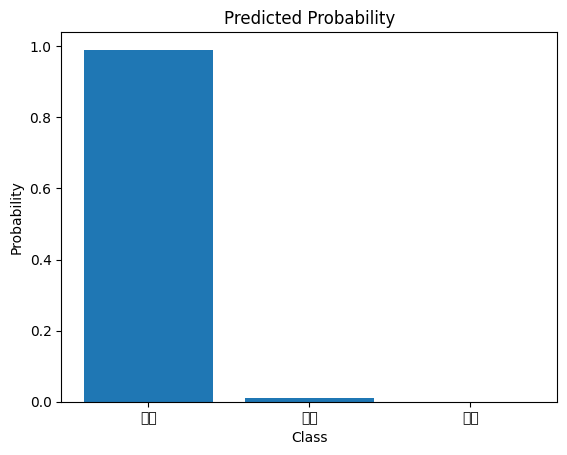

Review: Even  Disney  are  guilty   of  the  cash   cow   dise ase ,  after  the  roa ring  success  of  The  Love  Bu g  in  196 8 ,  the  house  of  mous e  cash ed  in  with  Her bi e  Rid es  Again ,  Her bi e  Go es  To  Mont e  Carl o ,  and  Her bi e  Go es  Ban ana s .  Ne ith er  sequel  capt uring  the  charm  and  ino ffe nsi ve  appeal  of  The  Love  Bu g  back  in  6 8 ,  in  this  one  we  find  race  driver   Jim  Douglas  and  his  side kick  Whe ely  Ap ple gate ,  enter ing  Her bi e  in  the  Mont e  Carl o  Ra lly .  Nat ural ly  things  outside  of  the  race  start  to  take  over  prior iti es ,  they  get  mixed  up  in  a  dia mond  robbe ry  and  Her bi e  falls  in  love  with  another  car ! .  The  car  stunt s  are  of  course  pleasant  and  easy  on  the  eye ,  and  it  would  be  chu rl ish  of  me  to  really  vent   ven om  on  such  a  friendly   piece  of  flu ff ,  it ' s  just  that  the  film  goes  nowhere  fast  and  personally  now  i  can  

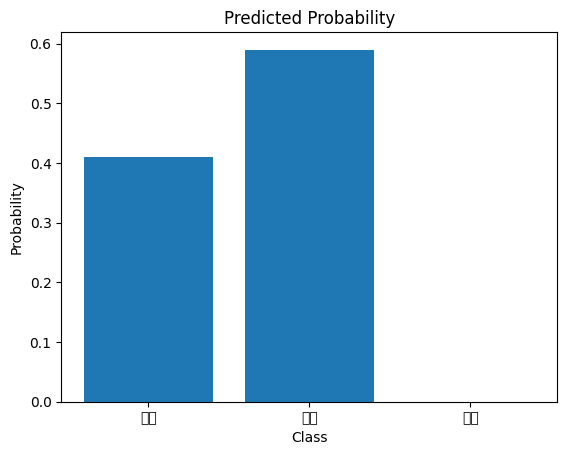

Review: < br  />< br  /> Very  dull ,  lab orious   adaptation  of  Ami s ' s  amusing  satire .  The  hero  is  portrayed  not  as  a  like able  loser   but  a  merely  oa fish   cre tin .  Most  of  the  rest  are  pure  cari cat ures  with  only  Helen   McC ro ry  putting  in  real  quality  and  provi ding  something  of  the  novel ' s  wit .  The  period  setting  is  camp ed  up  as  if  it  were  the  192 0 s ,  not  the  post - war  period  of  horror  comic s  and  rock ' n '  roll .  A  real  dud   even  by  the  standards   of  bad  UK   TV .< br  />< br  />                                                                                                                                                                                                                                                                                                                                                                                                                                      

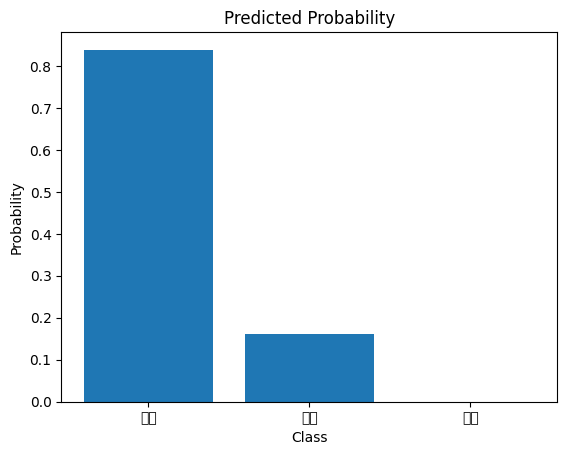

Review: In  the  eight ies ,  Sav age  Steve  Holl and  put  out  three  movies ,  two  of  which  are  classics   of  what  seems  to  be  a  very  small  genre ,  absurd ist  teen  comedie s .  The  thir d  " How  I  Got   Int o  Coll eg e "  does  not  mea sure  up  to  " Bette r  Off   Dead "  and  this  one ,  mainly  because  of  it ' s  lack  of  John  Cus ack  and  Cur tis   Arm strong  ( Exce pt  for  a  tiny   cameo ).< br  />< br  /> One  Cra zy   Sum mer  is  an  underrated   movie ,  with  lots  of  great  characteriz ations  and  gags .  As  I  recall ,  Sav age  Steve ' s  movies  were  vil ifie d  as  being  brain  dead  at  the  time  and  after  three  movies  he  dri fte d  into  children ' s  TV .  We  could  use  more  movies  from  the  likes  of  him .                                                                                                                                                                                                                       

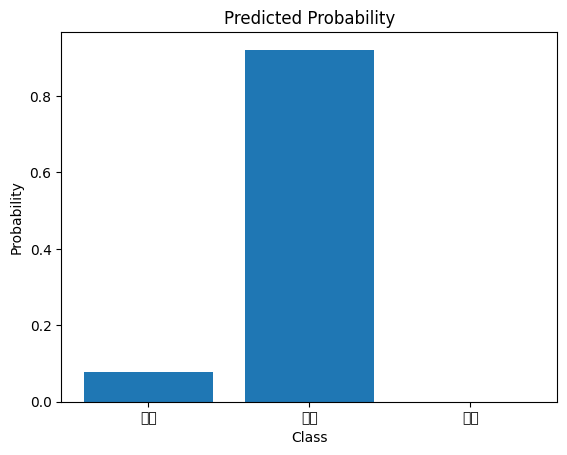

Review: Beaut iful   art  direction ,  excellent  editing  and  wonderful  stories  make  this  some  of  the  best  television  ever  produce d .  The  fact  that  it  was  relatively  short  lived  is  sadly  reflect ive  on  the  state  of  television .  I  highly  recommend  sna tch ing  these  up  as  they ' re  released ,  you ' ll  love  them .                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

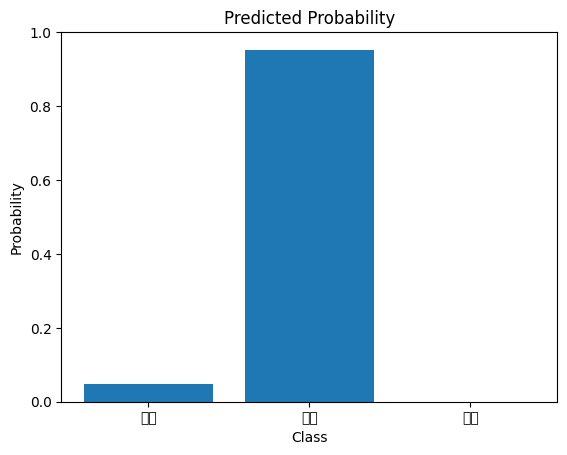

Review: This  is  a  plot  driven  movie  and  extremely  entertaining .  Nothing  start ling  or  original  within  the  plot ,  but  cru cia lly ,  it  moves  along  at  a  great  pace  and  therefore  keeps  your  attention .  I  didn ' t  really  notice  the  acting  which  I  guess  is  a  good  thing .  John  Mill s  was  fine  but  did  seem  to  take  everything  in  his  stri de  somewhat  considering  how  his  life  was  falling  apart  around  him .  He  would  be  clu mpe d  on  the  head ,  stand  up  20  seconds  later ,  dust   himself  down  and  carry  on  as  if  nothing  had  happened .  A  minor  qui bble   in  a  film  with  a  strong  story ,  authentic   locations   and  a  plot  that  continu ally  keeps  you  guess ing  right  up  to  its  conclusion .                                                                                                                                                                                                                    

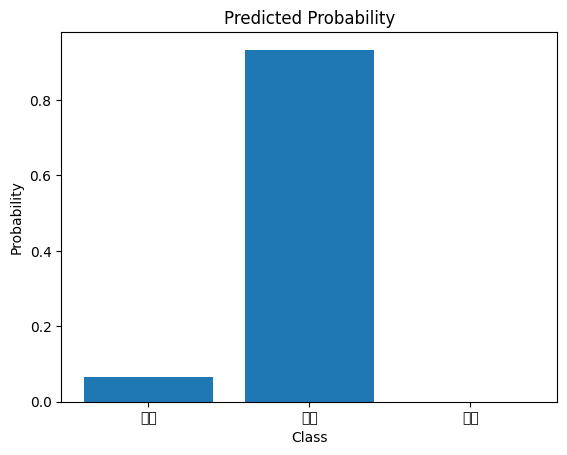

Review: Ple ase ,  If  you ' re  thinking  about  rent ing  this  movie ,  don ' t .  If  you ' re  thinking  of  watching  a  couple  of  down load ed  clip s ,  don ' t .  If  I  had  my  way ,  nobody  would  even  have  to  read  this  summar y .< br  />< br  /> The  acting ,  despite  being  one  fo   the  high  points  of  the  movie  was  still  pathetic .  The  director  was  pro bal y  a  sad ist .  The  witty   one  liners   were  something  you ' d  expect  from  a  room  of  highly  paid  anti - social  7  year  olds   that  eat  paint - chi ps  for  break fast .< br  />< br  /> The  problem  with  this  movie ,  is  that  it  tries  to  be  a  movie  like  " Evil   Dead  2 " ( do  not  under  any  circumstances   associate   these  2  movies )  in  that  it ' s  so  bad  it ' s  funny .  But  it  also  tries  to  be  funny  at  the  same  time ,  and  fails  so  overwhelm ingly  to  do  so ,  that  your  sense  of  humor  is  left  too  cri pp led  to  do  anything  but  s

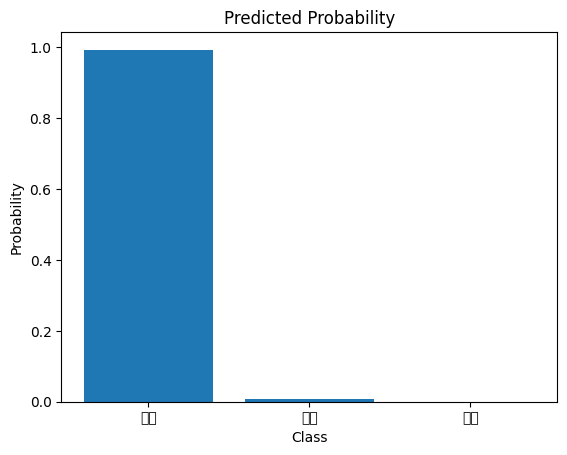

Review: very  rarely  it  happens  that  i  sit  down  to  write  a  comment  for  a  movie .... but  this  movie !!!!!! oh  my  hol y  god !!!!!! !! never  ever  was  there  a  Hin di  movie  better  than  this ..... . and  never  ever  there  came  a  movie  better  than  this ..... . it ' s  the  king  of  all  comedie s ..... < br  />< br  /> aa mi r  kh an  is  argu ably  the  best  CO MI C  actor  in  Indian  film  industr y ... though  its  funny  to  say  that  because  he  is  a  class  act , not  a  comedian ... but  what  he  has  done  in  this  film  is  perhaps  the  most  hilarious  performance  by  any  Indian  actor  in  an  out  and  out  comedy ...< br  />< br  /> sal man  kh an  has  never  been  a  good  actor  in  my  eyes .... but  this  movie  got  the  best  out  of  him .... he  was  innocen tly  comic ... if  ever  there  was  a  term   like  it .... just  what  the  doctor  order ed  as  far  as  his  role  in  the  movie  was  concerned ...< br  />< br  /> 

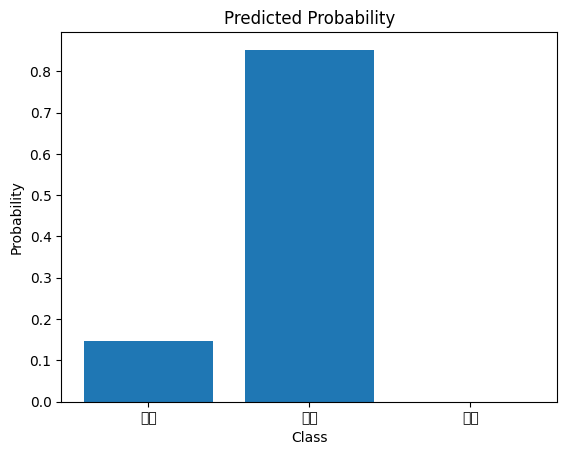

Review: I  remember  watching  this  when  it  was  made  and  thinking  it  was  brilliant  at  the  time .  Watching  it  for  the  second  time  nearly  20  years  later ,  I  still  think  Tra ffi k  is  brilliant  and  much  better  than  the  US  film  that  was  based  on  this  drama .< br  />< br  /> It  should  also  be  watched  by  all  our  come  today  gone  tom or row  politic ians  who  think  they  can  win  the  war  on  drugs ,  as  the  issues  raise d  in  this  film  are  as  per tine nt  today  as  they  were  back  then  at  the  end  of  the  80 s ,  and  unless  they  change  their  poli cies ,  will  be  so  in  another  20  years .< br  />< br  /> Well  written ,  well  made ,  beautifully  acted  and  superb ly  film ed .  A  thought  provok ing  drama  that  entertain s  as  well  as  brings  to  light  some  of  the  hard  real ities  of  the  criminal  drug  trade .                                                                                          

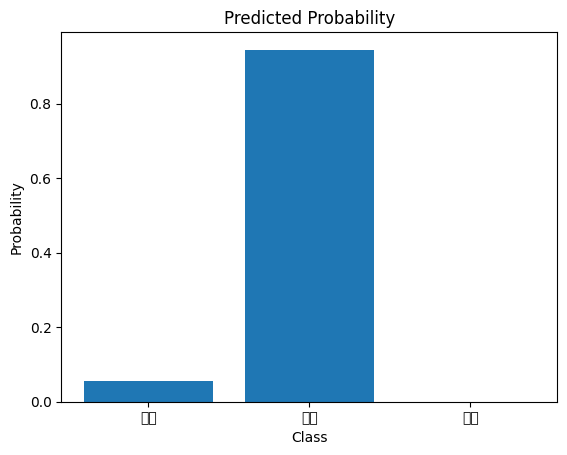

Review: THE  CE LL  fascinat ed  me  at  first  gla nce .  I  was  a  bit  surprised  about  that  fact ,  because  the  story  of  that  movie  is  absolutely  boring .  If  it  had  no  story ,  the  film  would  be  better .  Bu nu el s  " Un   chie n  and alo u "  comes  to  my  mind -  a  film  without  story ,  but  also  with  fascinating  and  sometimes  disturbing  imag es .  But  THE  CE LL  is  at  first  a  Hollywood - Movie ,  and  only  second  a  piece  of  art .  I ' m  very  interested  in  Tar se m ' s  next  project .  Ham let  on  Indian  could  be  very  interesting ,  especially  when  it  has  the  same  looks  as  THE  CE LL .< br  />< br  /> For  film  music  enthusias ts :  Howard   Sho re ' s  score  for  THE  CE LL  is  absolutely  marvel ous ,  but  a  hard  listen ing  experience ,  because  of  its  very  moder nis tic  style .                                                                                                                                  

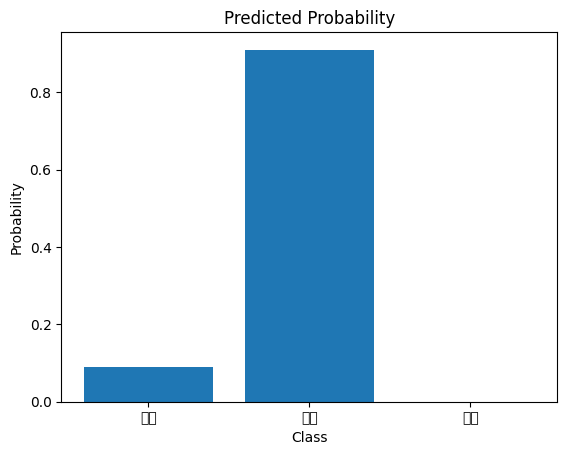

Review: Ant s  are  shown  in  cartoons   as  being  able  to  carry  away  chick en  leg s ,  water mel lon s ,  people ,  etc .  This  may  be  an  admi rab le  character istic  because  ants  carry  the  film  Ph ase  I V .  This  is  not  because  they  want  to ,  but  because  they  have  to .< br  />< br  /> The  movie  opens  with  a  narrat or  cry pti cally  expla ining  that  some  co smi c  event  has  come  over  the  earth ,  and  that  a  fellow  scientist  has  been  working  on  the  effect  this  disturb ance  has  on  the  ant  populat ion .  The  movie  is  broken  up  in  segment s ;  the  first  part  after  the  co smi c  event  is  Ph ase  I ,  and  so  on  until  the  end  of  the  movie ,  which  is  Ph ase  I V .< br  />< br  /> What  is  Ph ase  I V ?  Who  know s ?  We  don ' t  get  to  see  that  part ;  presum ably  it  has  something  to  do  with  the  bond ing  of  one  of  the  scientist s  stud ying  the  ants  and  a  girl  who  lived  in  the  are

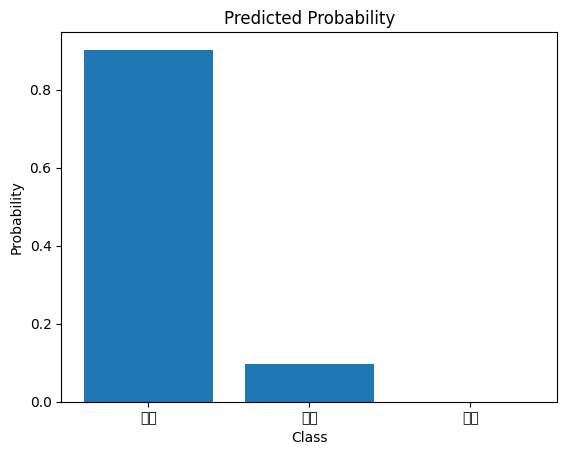

Review: There  is  a  special  heaven   rese rv ed  for  people  who  make  the  world  laugh .  Alon gs ide  Chap lin , Stan   and  Ol lie , The  Mar x  Bros   and ..... ( fill  in  your  own  special  favour ite s ) space  must  be  made  for  everybody  connect ed  with  " Ai rp ort   80  -  Con cord e , the  movie ".  Robert  Wa gne r  in  particular  exce ed s  all  expectations  giving  the  comedy  performance  of  a  life time . I  would  never  have  thought  he  had  it  in  him .  The  only  way  he  could  have  been  funnie r  would  have  been  to  have  wor n  a  red  nose   and  a  rev ol ving  bow   tie .  British  movie goe rs  will  recogni se  the  fat   one  from  Can non  and  Bal l  pretend ing  to  be  a  Russian  ath let e , a  nice  trick   if  he  could  have  pulled  it  off  but , trag ical ly , he  couldn ' t . I  have  a  14   year  old  lab rad or  more  ath let ic  and  almost  as  funny .  George  Kenne dy  -  bles s  him  -  has  a  part  that  requir

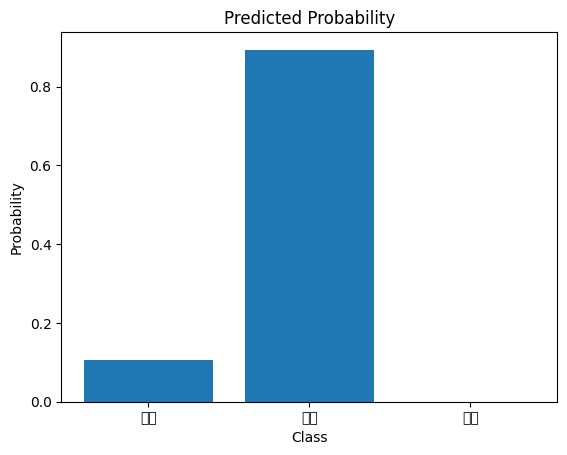

Review: The  title  pretty  much  lets  you  know  what  you ' re  get ting .  It ' s  a  grad e - C  how ler  but  not  as  bla tant ly  funny  as  I  was  ho ping .  Direct ed  by  exploitation   film  special ist  Eddie  Rome ro  from  a  story  that  originally  came  from  Jon ath an  Dem me  ( long  before  directing  " Si len ce  of  the  Lam bs "  and  " Phi lad el phi a "),  this  low - budget  197 2  action  movie  was  obviously  filmed  in  the  Philip pin es  but  set  in  some  ano ny mous  third  world  country .  Play ing  hooke r  and  small - time  drug  deal er  Lee  Dani el s ,  bla x plo itat ion  super star  Pa m  Gri er  plays  the  first  half  of  the  title  role ,  while  long - forgotten  Marg are t  Mar ko v  is  the  other  half ,  Kar en  Bren t ,  an  unlikely   Pat ty  Hear st - like  political  revolution ary  looking  to  partner   with  her  com rad es  to  overt hr ow  the  op press ive  local  govern ment .  Nat ural ly  ant agon istic  toward  eac

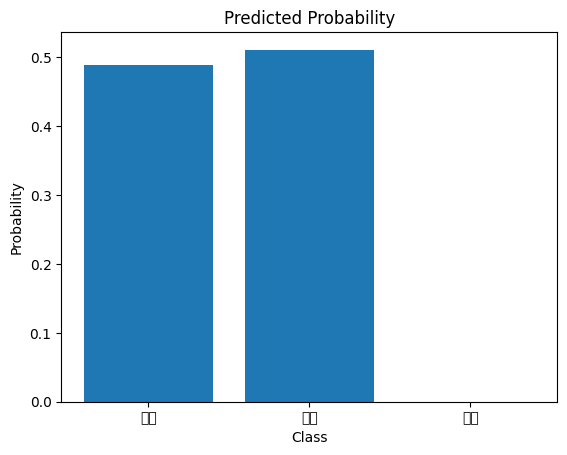

Review: Exce llen t  special  effects  make  this  disaster   move  very  pla usi ble .  One  can  see  that  the  producers  went  to  some  trouble  to  get  the  display s  on  the  computer  screen s  just  right  -  it  all  makes  it  very  convincing .  The  sets  are  also  very  authentic   look ing .  A  good  choice  of  music  round s  off  the  film  nice ly .< br  />< br  /> Acti ng  is  good  and  the  presence  of  David  Suc het   adds  some  weight   to  the  cast  of  course .  Comp are d  to  other  movies  of  this  genre ,  Fl ood   is  right  up  there  with  the  best  of  them .  Thank fully ,  the  " human  drama "  aspect  has  not  been  overd one ,  as  is  often  the  case  with  this  type  of  movie .  The  human  suffering  is  portrayed  in  perfect  balance   with  the  actual  flo odi ng  scenes .< br  />< br  /> And  of  course ,  the  movie  confi rm s  what  many  of  us  suspect  anyway :  we athe r  fore cast ers  so  often  do  not  get  it  ri

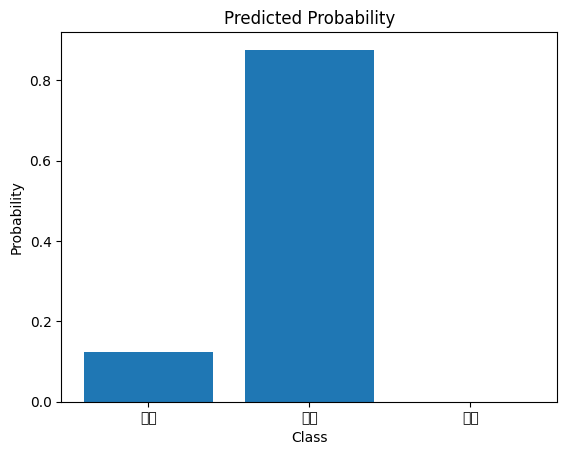

Review: Don ' t  get  fool ed  by  the  ' award s '  and  the  comment  belo w .  This  is  just  1  poor  movie .  The  way  George  Kat t  played  his  character  ( the  soft   gangs ter )  makes  it  very  annoying  to  watch .  The  conversation   in  the  opening  scene  is  a  dramatic  display   of  this .  De  in  the  rest  of  the  film  the  character ' s  head  seems  to  be  somewhere  else .  His  emotions  don ' t  match  with  the  things  that  happen  in  the  film . The  things  he  says  as  a  voice - over  doesn ' t  add  anything  to  the  film .  It  just  makes  Ze us  an  even  more  spin ele ss  character  with  is  head  in  the  clo ud s .< br  />< br  /> The  story  and  the  film  was  put  together  with  a  total  lack  of  fantas y .  All  parts  of  the  film  were  poorly  stolen   from  other  modern  director s .  Let ' s  hope  Jon   Ros ten  will  use  his  own  style  and  ideas  for  his  future  films .                                         

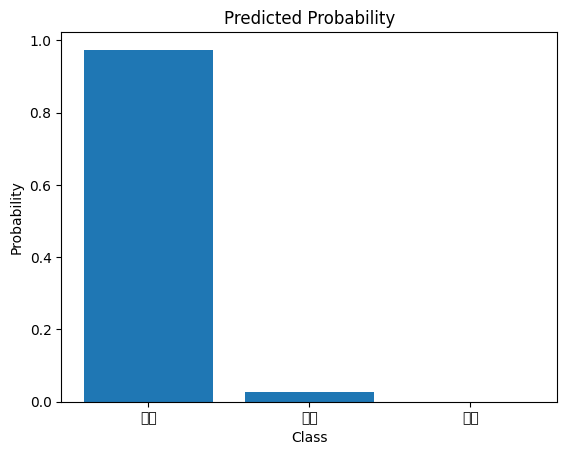

Review: Tal k  about  rubbish !  I  can ' t  think  of  one  good  thing  in  this  movie .  The  screenplay  was  poor ,  the  acting  was  terrible  and  the  effects ,  well  there  were  no  effects .  I  can ' t  believe  the  writer  of  this  movie  did  I denti ty ,  everything  in  this  movie  made  me  sick  to  start  to  finish .< br  />< br  /> The  front  cover  of  the  video  box  shows  a  show man  with  shar k  like  teet h  and  scary  eyes .  I  looks  like  a  scary  villain ,  but  like  the  old  saying  " never  judge   a  book  by  it ' s  cover ",  the  whole  villain  looked  like  a  card board  cut  out .  One  part  in  the  film  a  girl  gets  killed  by  a  sal ad  ton gs ,  terrible .  The  setting  was  bad  enough ,  like  they  could  of  set  the  whole  thing  in  La plan d  but  no ,  a  tro pic al  island  instead .< br  />< br  /> I  took  this  movie  as  a  spoof ,  which  I  think  they  wanted  it  to  be  but  the  only  thing  that  mad

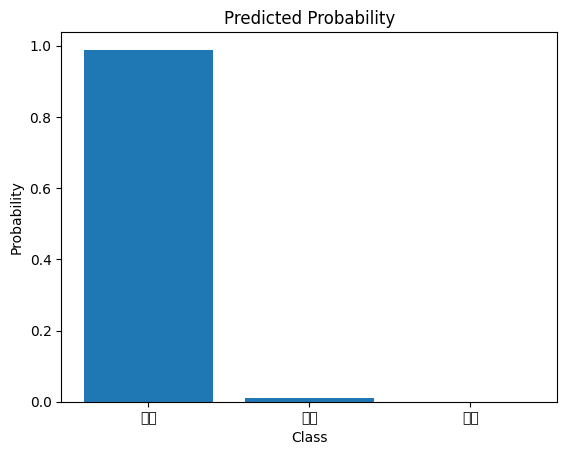

2/2 [==============================] - 1s 309ms/step
Review: Fa vel a  Ri sing  is  a  documentary  about  the  slu ms  of  Ri o ,  the  fa vel as ,  specific ally  the  most  violent  one ,  Vi g � � rio   Ger al .  Ac cord ing  to  this  film ,  a  lot  more  kids  have  died  viol ently   in  Ri o ' s  fa vel as  over  the  last  decade   or  so  than  in  Is ra el / Pal estin e  during  the  same  period  --  a  fact  asto nish ing  if  true ,  which  shows  how  under - recognize d  this  social  problem  is  in  the  rest  of  the  world .  This  is  an  important  topic ,  especially  for  those  who  see  hope  in  gras s root s  efforts   to  mar sha l  the  need iest  and  most  at  risk   through  a  vi bran t  cultural   program .  This  is  a  compelling  documentary ,  if  occasionally  mar red  by  a  somewhat  too  personalit y - based  version  of  events  and  by  gra in y  dig ital   video  and  film  that  sometimes  may  make  you  think  you  need  to  have  your 

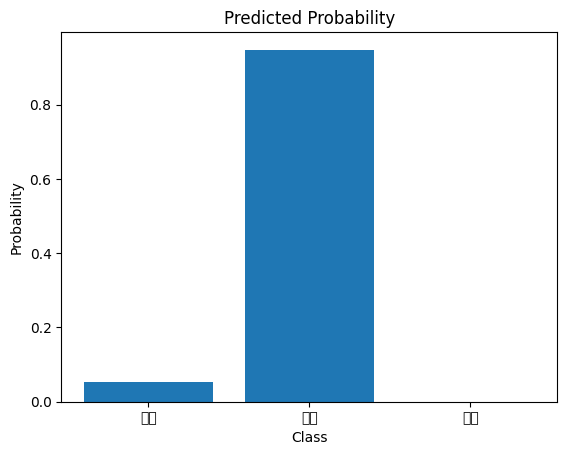

Review: I  was  su prem ely  disappointed  with  this  one .  Having  just  read  the  wonderful  Oscar  Wild e  story ,  I  had  hope d  for  at  least  a  little  of  the  magic  to  translat e  onto  the  screen .  Well ,  there  was  none .  This  version  played  like  a  cond ense d ,  dumb ed  down  Rea der ' s  Di ges t  movie .  Not  only  did  it  feel  rush ed ,  it  was  cheap ened  and  need lessly  re  written .  Ma jor   characters  and  plot  points  were  either  changed  or  completely  remove d .  I  appreciate  the  difficult ies  in  trying  to  bring  a  novel  to  the  screen ,  especially  on  what  may  very  well  have  been  a  limit ed  ( TV )  budget ,  but  there  is  no  excuse  for  man gli ng  a  great  story  in  this  way .  I  thoroughly  recommend  reading  Wild e ' s  tale  of  the  dep ra vity   that  exist s  under  even  the  most  beautiful  ext eri ors .  But  I  cannot  advise   anyone  to  rent  this  tra vest y .                            

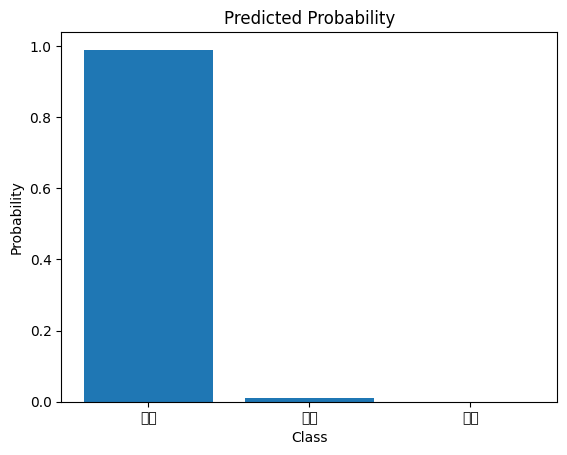

Review: this  movie  is  so  bad .  but  its  so  bad  that  i  was  laughing  my  ass  off .  for  people  that  like  movies ,  do  not  watch  this  one .  for  people  who  like  movies  good  and  bad ,  i  recommend  this  one .  the  story  lines  shak y , the  script  is  horrible , the  acting  is  horrible  to  medi ocr e .  the  soundtrack  throughout  the  movie  was  corny   but  i  loved  it .  the  cool  catch phr ase s  were  a  plus  tho .  ha  ha . " if  it  can  ble ed ,  it  can  die ".  the  fight  scenes  crack ed  me  up .  it  seemed  to  me  like  they  spent  more  time  on  those  parts  than  any  other  cu z  the  fight  scenes  for  the  most  part  were  pretty  clean .  i  almost  feel  like  this  movie  could  have  been  good  if  it  weren ' t  for  the  f / x .... no  it  would  have  still  been  a  crap shoot .  the  eye  thing  was  corny .  and  how  the  chick   was  eating  the  guys  stom ach  in  the  kit che n , they  could a  done  somethi

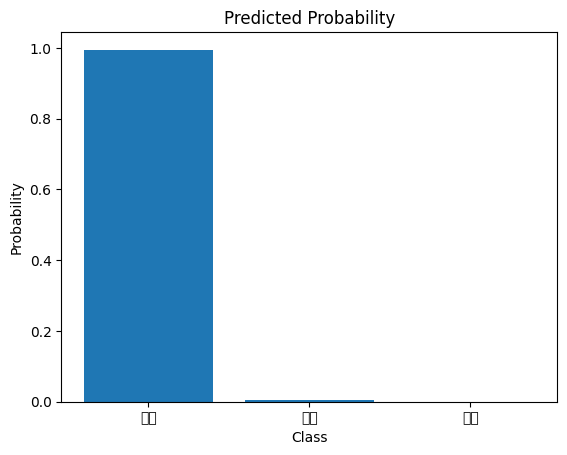

Review: Nothing  I  dislike   more  than  a  kun g - fu   movie  that  plays  for  laughs .  It  is  the  main  reason  I  can ' t  stand  Jackie  Chan  ( or  his  look alik es ).  He  was  not  always  a  clo wn ,  I  must  add . " My  Young  Au nti e "  is  slaps tick   martial  arts  of  the  worst  kind .  It  is  a  perfect  example  of  how  the  sub genre  was  brought  down  to  the  mu d  by  endless  silly  antic s  and  child ish  behavior .  Un less  you  are  5 - year - old ,  I  really  don ' t  understand  how  anyone  could  find  this  kind  of  film  funny .  But  humor  is  indeed  a  very  subject ive  thing .  Perso nal ly ,  I  think  this  type  of  approach  did  perm ane nt  damag e  to  the  belo ved  sub genre .  I  did  think  leading  lady  Kar a  Hu i  was  very  good  here .  But  I  had  such  a  hard  time  sitting  through  this  one  that  I  could  not  enjoy  her  fine  performance .  If  you  don ' t  mind  all  the  sil lines s ,  you  might  enjo

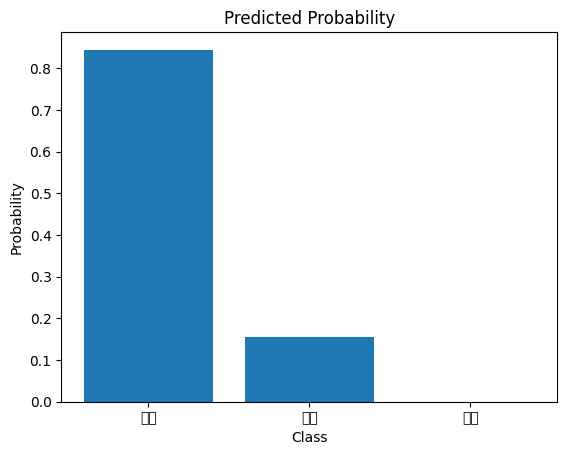

Review: Count   Las z lo  ( Ra lph   Fi en nes )  has  just  been  transf err ed  to  a  hospital  in  Ital y  during  World  War  II .  He  is  horrifi cally  burne d  from  an  am bus h .  His  nu rse   Han a  ( Julie tte  Bi no che )  ten ds  to  him ,  body  and  mind ,  for  she  fear s ,  quite  right ly ,  that  he  may  be  a  very  trouble d  soul .  In  the  course  of  his  care ,  the  Count   starts  to  tell  Han a  of  his  recent  past .  It  seems  he  worked  in  a  government  cap aci ty  in  Africa ,  where  he  met  a  beautiful  married  lady  named  Kath erin e  ( Kris tin   Scott  Thom as ).  Although  they  tried  to  avoid  each  other ,  they  fell  in  love .  After  a  brief  aff air ,  Kath erin e  called  it  quit s ,  leaving  the  Count   des ola te .  Even  so ,  the  two  would  meet  again ,  under  heart - wre nch ing  circumstances .  Meanwhile ,  Han a  herself  falls  for  a  Si h k  man  in  the  British  bomb   squa d .  Ye t ,  the  war  is  r

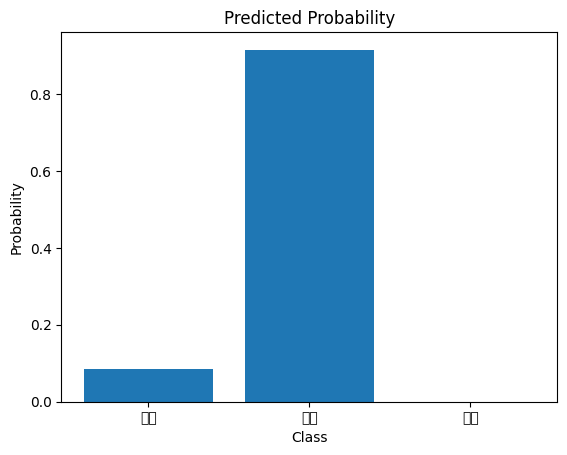

Review: I  saw  this  movie  in  its  brief  run  in  " art  house "  cinema  in  ' 6 9 .  I  found  it  so  funny  that  I  literally  spent  part  of  the  movie  on  the  floor ,  having  laughed  so  hard  I  fell  out  of  my  seat .  In  retr os pect ,  years  later ,  I  thought  it  had  been  done  by  Mel vin   Van  Pe eb les .  When  I  mentioned  it  to  a  friend ,  he  said  that  a  friend  of  his ,  Down ey  S r .,  filled  virtually  every  non - acting  role  in  the  flick :  Direct or ,  writer  producer ,  etc .  He  was  right  of  course ,  and  my  memory  was  wrong ,  except  that  this  WA S  one  of  the  funnie s  movies  ever  made .  The  part  of  " the  Ar ab "  was  particularly  price less .                                                                                                                                                                                                                                                                        

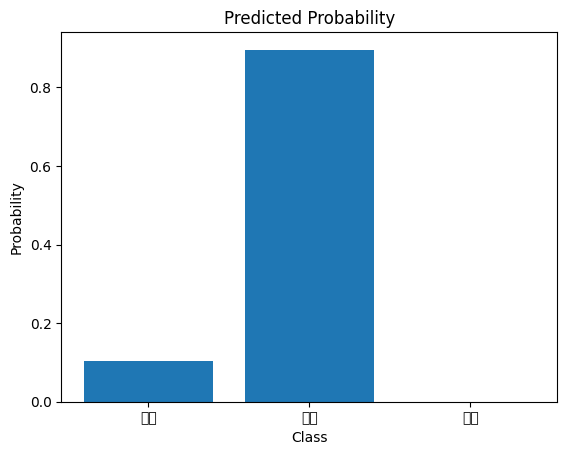

Review: Rol e - rever sal   remake  of  194 2 ' s  " The  Ma jor   and  the  Min or "  has  Jerry  Lewis   step ping  into  the  part  originally  played  by  Gin ger  Roger s ,  but  unfortunately  this  ane mic   out ing  is  missing  a  lot  more  than  just  Gin ger .  Lewis   attempts  to  pass  for  a  child  when  board ing  a  train ;  he ' s  successful ,  but  the  dece ption   leads  to  a  string   of  comic  and  romantic  confusi ons .  Sid ney  She ld on  adapt ed  the  screenplay ,  to ssi ng  in  musical  moments  for  Dean   Martin  ( playing  yet  another  in  his  stab le  of  second - ban ana s )  and  a  je wel - robbe ry  subplot  ( which  is  dir e ).  Dian a  L yn n ,  who  played  the  wi ly  teenager   in  the  original  film ,  plays  Lewis '  love - interest  here .  She ' s  cute ;  Jerry  isn ' t . * 1 / 2  from  ****                                                                                                                                            

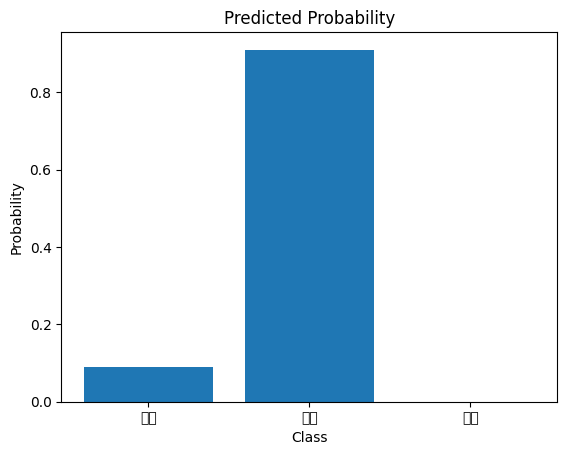

Review: On  this  site  I ' ve  often  lam bas ted  the  Americans  for  not  knowing  how  to  write  comedy ,  BU T ,  while  they ' ve  never  produced  anything  of  the  quality  of  ' Fa wl ty  Tow ers ',  ' Black add er '  or  ' The  Fal l  and  Ri se  of  Reg inal d  Per rin ',  they  have  also  never  ( to  my  know ledge )  made  anything  as  bad  as  this :  the  na dir   of  British  comedy .< br  />< br  /> On  my  Ric ht er  scale   of  comic  awful ness ,  it  rate s  only  behind  the  truly  exe cra ble  ' Are  You  Being  Ser ve d '  as  the  worst  comedy  show  in  the  English  language ,  with  bad  acting ,  annoying  characters  and  humour  that  I ' d  grown  out  of  before  I  left  primar y  school .  Unfortunately ,  it  was  part  of  a  large  cro p  of  shows  back  then ,  along  with  ' Da d ' s  Arm y ',  ' It  ain ' t  Hal f  Ho t  Mu m '  and  ' All o ,  All o '  that  relie d  on  ridiculous  situations  and  familiar  catch - phr ase s  to  kee

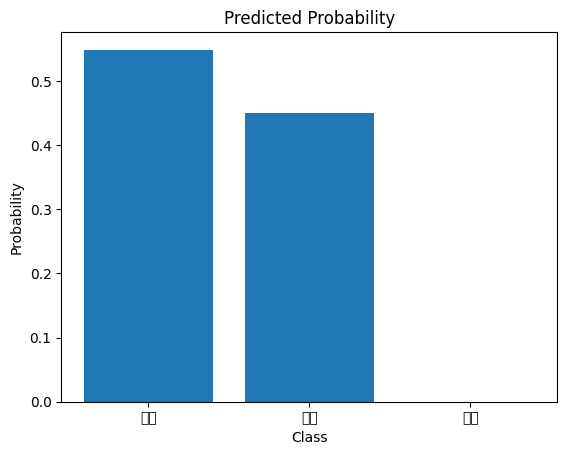

Review: No  one  in  this  movie  has  very  much  to  do .  This  is  probably  the  longe st  6 5  minutes  I ' ve  ever  spent  watching  a  movie .  The  makeup   effects  on  the  pia nis t  with  mac ro me gli a  are  pretty  good ,  but  that ' s  the  only  thing  that  keeps  this  from  being  rate  a  1 .  The  doctor ' s  assistan t  goes  through  extreme  mood  swi ngs   from  pass ivi ty  to  hysteri a  in  seconds  and  then  seems  to  forget  where  she  was  in  the  next  scene .  The  director  asse mble d  a  lot  of  the  right  ing redi ents  for  a  mad - doctor  movie ,  but  somehow  forgot   the  ske let on  of  a  story  to  hang   them  on .  Un less  you  know  someone  in  the  cast  or  cre w ,  I  wouldn ' t  recommend  even  sa mpl ing  this  one .                                                                                                                                                                                                               

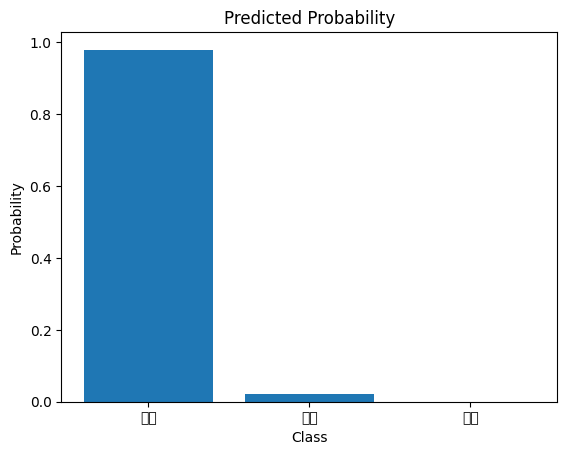

Review: I  grew  up  watching  the  " Bo wer y  Boy s "  on  the  weekend s  and  even  at  young  an  age  I  could  tell  this  was  low  rent  stuff  as  the  name  impli es .  Still  it  was  fun  to  watch  Sat ch  ( Hall )  get  the  better  of  Mu gg s  ( Gor ce y )  after  Mu gg s  would  beat  the  crap  out  him .  The  East   Sid e  Kid s  stuff  were  never  shown  even  though  it  was  public  dom ain  stuff  and  probably  cheap  to  run ,  it  was  just  to  low  a  standard  for  kids  to  tune   in  even  though  we  only  had  like  5  channel s  to  watch .  Enter   the  year  200 5  and  I  am  rep os ses in  about  my  child hood .  I  can ' t  find  any  Bo wer y  Boy s  on  DVD  but  I  found  The  East   Sid e  Kid s  on  disc   and  also  on  a  public  dom ain  web site .  Thank fully  I  saved  my  dou gh  and  saw  Bo wer y  Bl it z  on  the  web   for  free ,  and  it  really  really  blow s .  Now  I  can  see  there  are  some  Bo wer y  Boy s  and  mayb

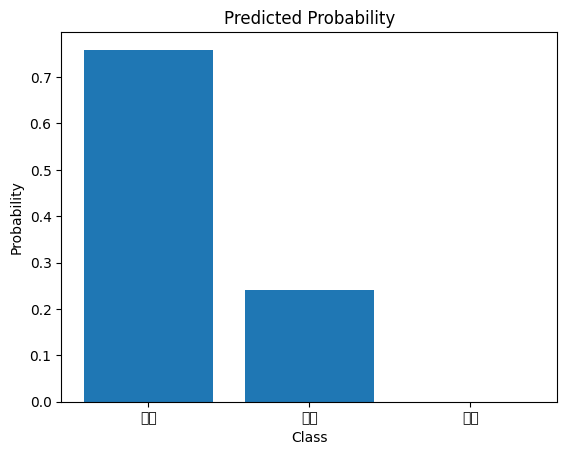

Review: The  most  enjoyable  parts  of  this  film  were  the  clip s  from  the  original  movie .  The  acting  was  poor  and  the  premise  of  sexual  score card s  was  rev ol ting .  The  effects  were  mar gin al  at  best .  There  were  no  stand  out  performances ,  Am y  Ir ving  was  put  in  this  film  to  try  and  get  a  part  of  the  Halloween   H 20  audience .  The  original  was  much  more  enjoyable  and  grat ify ing .  I  am  sorry  to  say  that  this  is  not  going  to  be  one  of  the  years  10  best ... so  far  it  is  at  the  bottom  of  my  list .  Don ' t  bother  with  this  one  folk s !!                                                                                                                                                                                                                                                                                                                                                                          

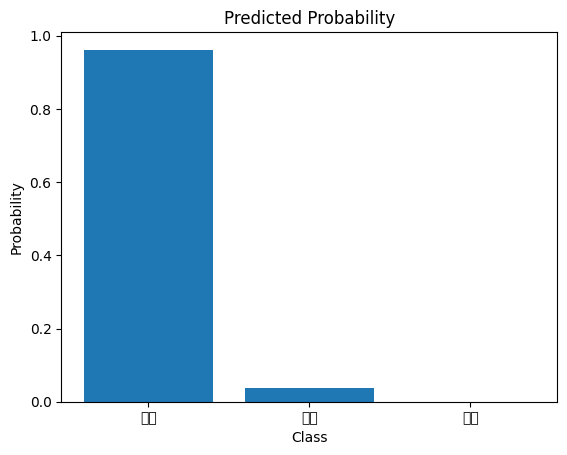

Review: This  is  another  one  of  those  movies  I  just  knew  I  would  hate ,  but  it  ended  up  not  being  as  bad  as  one  would  expect .< br  />< br  /> It  has  a  lot  of  T & A  in  it  and  even  the  DVD  men u  is  cho cked   full  of  women ' s  breast .  The  first  few  scenes  of  the  movie  has  a  lot  of  sex  and  nudity  and  I  was  beginning  to  think  there  would  be  no  story  at  all  just  exploit ing  nudity  for  the  sake   of  making  money  off  a  popular  pre quel   8 M M .< br  />< br  /> As  I  continu ed  to  watch  there  was  just  more  sex  and  nudity  and  main  characters  that  I  could  care  less  about ,  but  then  the  story  started  to  unfold   and  I  started  to  see  a  point  to  it  all ,  and  it  was  a  ta d  better .< br  />< br  /> It  is  about  a  man  who ' s  fia nc é  is  the  daughter  of  an  Am bas ador   and  they  all  have  a  promising   future  until  nude   photo s  of  a  men age  a  tro is  sex  a

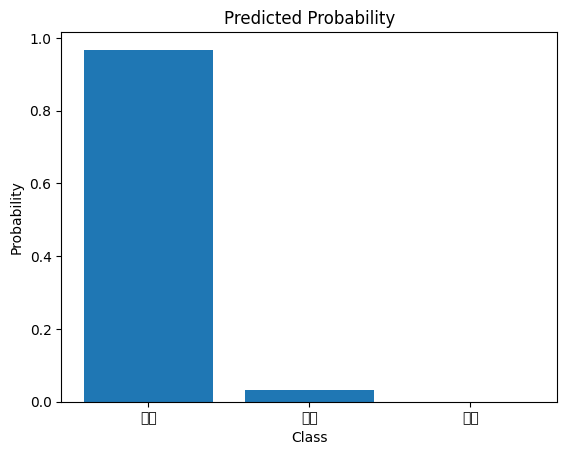

Review: I  just  finished  watching  one  episode ( S 1 - # 5  A  boy  in  a  bus h ),  so  maybe  my  review  is  not  very  fair .< br  />< br  /> But  based  on  that  episode ,  this  is  a  very  poor  version  of  C SI ,  the  acting  is  crap .  The  main  character ,  Dr   whatever  her  name  is ,  is  so  fake  it  actually  hurt s .  I  wouldn ' t  cast  her  to  do  an  add  for  dog  fo od !< br  />< br  /> The  other  hurt ful  thing  is  David  Bor ea na z  of  the  " Angel "  fame ,  a  good  actor ,  does  a  great  job ,  but  wasted  co z  of  the  idiot ic  acting  of  that  woman .< br  />< br  /> Su pp ort ing  cast  is  OK ,  but  all  is  ruined  due  to  this  stupid  acting  of  Emil y  Des chan el  . < br  />< br  /> Very  disappointing  version  of  C SI ,  very  sorry  to  see  it  appear  on  the  film ogr ap hy   of  some  of  the  potential  talents  involved  in  it .< br  />< br  /> That  woman  is  really  sh # t ,  at  least  in  that  episode .  But

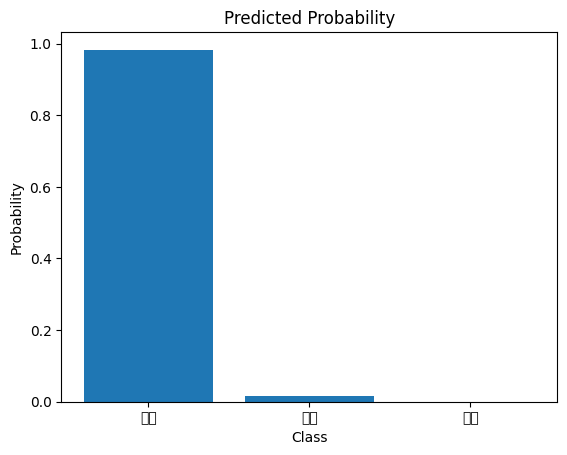

Review: Joe  is  the  movie  about  the  dark  side  of  the  force  of  the  1960 ' s  in  America ,  and  Susan   Sar and on  had  nice  boo bs .  This  movie  scared  me  so  much  when  I  saw  it  in  the  theatre   that  I  never  liked  Peter  Boy le  until  Young  Frank ens te in  and  was  still  quite  lee ry  of  him  even  after  that  comedy .  Look ing  back  now  from  today ' s  experience ,  this  film  seems  current  again  in  being  direct  and  to  the  point  of  half  the  ele ctor ate ' s  app ro val   of  John  McC ain ' s  " Joe  The  Pl um ber "  type cast  and  their  fear  of  ele cti ng  a  black  man  as  Pres ident  of  the  US A  in  the  coming  weeks .  A  black  Pre z  would  be  seen  as  sweet  revenge  of  the  " ni gger s "  but  bound   to  again  bring  fire  to  many  minds   if  not  the  streets ,  this  time  by  Joe  enthusias ts .  So ,  the  spirit  of  Joe  in  the  film  is  resu rre cted  in  the  camp ai gn   of  Joe  The  Pl um ber

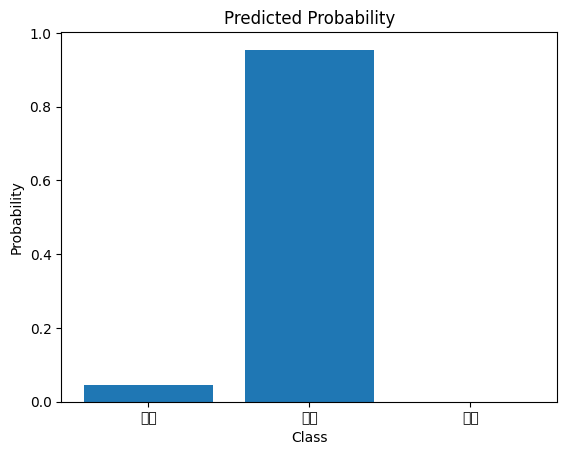

Review: A  nice ,  humorous   mix  of  music  hall  ( in  the  first  third  most ly )  and  police  pro ce du ral  mystery  as  the  various  suspect s '  stories  start  to  colla pse .  The  final  expos ure  of  the  murder  may  come  as  a  surprise  if  you  don ' t  watch  close ly .  A  gritty   look  at  Paris  of  the  time .  You  can  ignore   the  final  scene  ( the  Hollywood  ending ).  Louis   Jo u ve t  is  best  as  the  police  ins pect or  who  seems  to  be  just  passing   through ,  but  is  really  on  top  of  things .                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

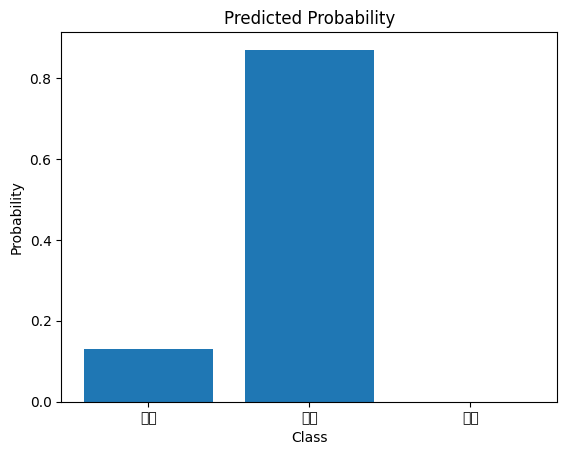

Review: This  was  one  of  the  few  shows  that  my  wife  and  I  agree d  on  watching .  I  was  upset   to  hear  that  it  was  cance le d ,  especially  because  I  didn ' t  realize  the  rating s  were  so  poor .  As  far  as  I  knew  it  was  doing  very  well  with  a  lot  of  viewers .  Alm ost   all  my  friends  and  most  of  the  people  I  spoke   to  watched  the  show .  Now  we  are  stuck  watching  either  crappy  shows  or  DVD ' s .  How  bad  was  the  show  doi ng ?  does  anyone  know  the  real  results   of  the  shows  viewing s ?  I  know  that  when  it  went  to  Thu rs days ,  it  was  more  difficult  for  me  to  catch .  Thank  G * d  for  D V R ' s ! < br  />< br  /> Anyway s ,  this  was  a  real  surprise  to  know  that  there  will  be  no  more  " The  War  At  Home ".  If  any  other  net works  see  this ,  PL EA SE   P I CK   U P  THE  SH O W !!!!   PL EA SE !                                                                              

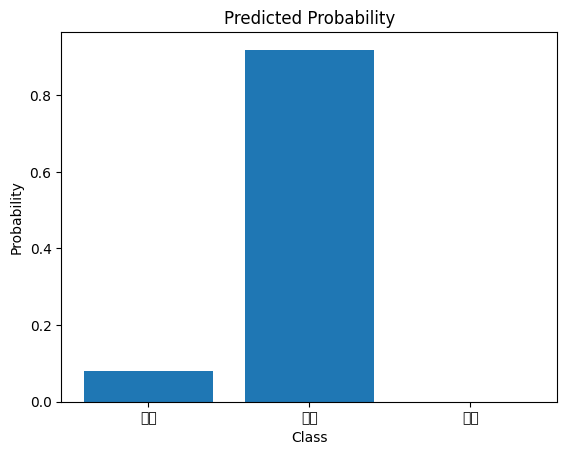

Review: Can  they  possibly  get  any  worse  than  this ?  Prob ab ly .  But  after  all  Steven  Sea gal  gets  to  do  what  he  does .  Well  kind  of ;  this  time  instead  of  mor tall y  wound ing  the  bad  guys  he  just  wound s  them .  By  reputation   of  being  a  bad  ass  agent  Sea gal  is  hired   to  deliver  a  special  pack age  from  France   to  America .  But  it  is  not  an  easy  task   with  so  many  people  trying  to  inter ce pt  and  fou l  up  the  mission .  The  fights  just  don ' t  have  enough  bite   and  the  big  ban gs  are  just  big  and  that ' s  all .  Anna - Louis   Pl ow man  seems  to  be  the  only  cast  member  not  to  appear  wood en .  Also  in  the  cast  are :  Jeff ery  Pie rce ,  Max   Ryan   and  Harry  Van  Gor ku m .  Don ' t  put  all  the  blame  on  Sea gal  for  this  clu nke r .                                                                                                                                            

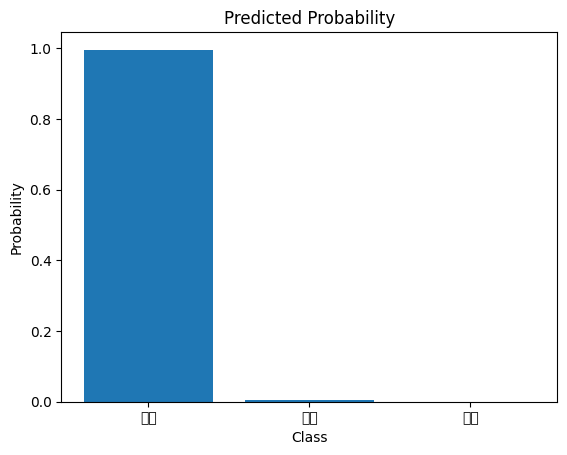

Review: Hen ry  ( Don  Am ech e )  turns  up  at  the  entr ance  to  Hell   and  reco unt s  his  life  story  to  His  Exce llen cy  ( La ir d  Cre gar ).  The  story  focus es  on  his  relationships  with  fem ale s  throughout  his  life ,  and  in  particular ,  his  relationship  with  Mart ha  ( Gene  Ti ern ey ).  At  the  end  of  the  film ,  we  cut  back  to  Henry  and  His  Exce llen cy  for  a  very  predictable  ending .< br  />< br  /> Unfortunately ,  there  is  nothing  more  to  say  about  the  film  because  nothing  happens .  Its  a  sentimental   story  of  one  man ' s  life  and  its  very  boring .  I  watched  it  with  my  girlfriend  and  my  dad  and  we  all  thought  it  was  rubbish ,  despite  the  Lu bit sch   touch .  I  ya wn ed  more  than  15  times .  Hu go  ( Charles  Co burn )  is  good  whenever  he  is  on  screen  as  the  grand father  and  there  were  a  few  funny  moments  of  dialogue .  The  colour   made  it  a  good  spect ac le 

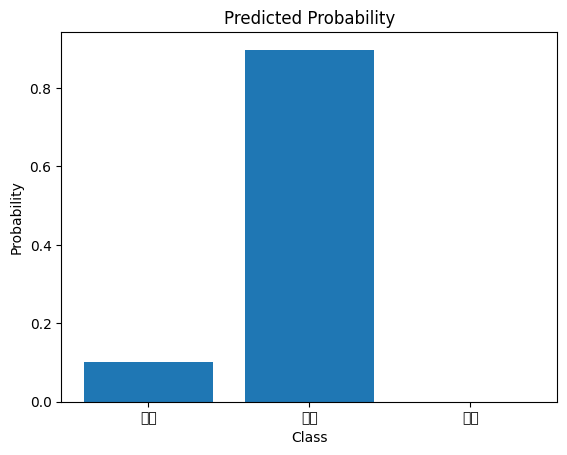

Review: I  remember  watching  this  movie  when  it  came  out  as  a  t . v .  movie  of  the  week  in  the  early  1970 ' s .< br  />< br  /> Although  I  haven ' t  seen  this  movie  in  over  30  years  I  remember  how  creepy  it  was ... the  sister ' s  dead  body  in  the  base ment ,  the  storm   rag ing  outs ide ,  the  creepy  house  with  no  electr ici ty  and  a  killer  still  on  the  premise s .< br  />< br  /> They  just  don ' t  make  t . v .  movies  like  this  one  anymore .  Eliza beth  Mont go mer y  was  a  very  underrated   actress  and  I  liked  her  in  not  only  " Be twi tche d ",  but  several  of  her  post - Be witch ed  roles ,  such  as  this  one  and  197 5 ' s  " The  Leg end  of  Li zz ie  Bor den ".< br  />< br  /> I  really  wish  that  someone  would  come  out  with  a  DVD  that  has  several  of  the  1970 ' s  t . v .  movie  of  the  week  on  one  DVD .  Wo ul d n ' t  it  be  awesome  to  watch  " When  Michael  Cal ls ", " Bad 

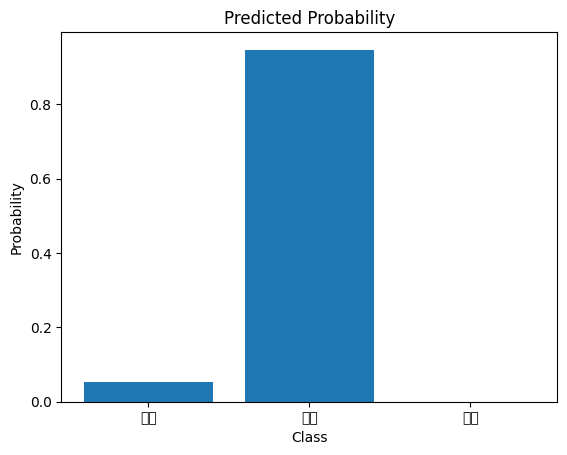

Review: Three   children  are  born  at  the  exact   same  time , during  a  lun ar  ec lip se . Just  before  their  10 th  birth day  they  emb ar k  on  a  killing  spre e ." Blood y  Bi rth day "  is  a  typical  slasher  from  early  80 ' s . It ' s  a  pretty  average  stuff  with  plenty  of  nudity . The  evil  children  never  generate   any  menac e  and  there  is  almost  no  suspense . There  is  also  no  gore  or  scares   in  " Blood y  Bi rth day " , but  the  film  is  mild ly  entertaining . Unfortunately  no  real  explanation  is  provided  for  the  kids  sudden   hom ici dal   mani a . The  murder  scenes  are  quite  grue some  for  example  we ' ve  got  death  by  hand gun , baseball   bat , skip ping  rop e  and  sho vel . So  if  you ' re  a  fan  of  early  80 ' s  slasher  movies  give  this  one  a  look .                                                                                                                                                       

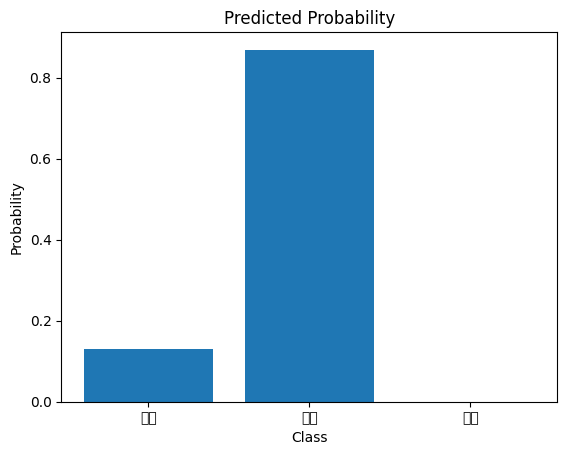

Review: Be yon d  the  Clo ud s  is  in  many  ways  the  weird est  film  I  have  ever  seen .  Not  for  its  Cu lt  appea l ,  gore ,  or  even  for  its  idea s ,  but  because  of  the  elements  that  combin e  to  make  this  a  masterpiece  of  cinema .  Be yon d  the  Clo ud s  was  directed  by  Mich ela nge lo  Anton ion i ,  one  of  Ital y ' s  most  famous  director s .  However ,  if  you  gave  this  film  only  a  quick  watch - over ,  pass ively  I  mean ,  it  would  seem  one  of  those  melodrama tic  and  often  pointless  romance s .  This  movie  deserves  great  attention ,  to  the  point  of  emb raci ng  all  its  chees e .  By  chees e  I  don ' t  mean  a  slic e ,  but  a  whole  brick   of  che dd ar !  The  music  seems  like  it ' s  from  some  Italian  porno ,  the  story  and  dialogue  like  they  are  from  a  corny   Japanese  so ap ,  and  the  meta pho rs  are  so  obvious  you  want  to  sma ck  yourself  on  the  head .< br  />< br  /> But 

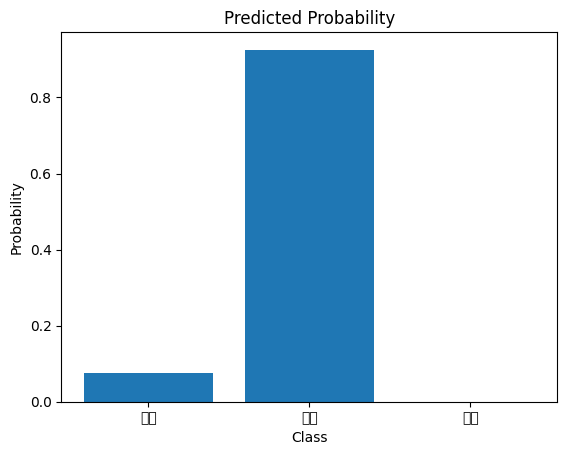

Review: Les lie  Ni else n  is  usually  someone  whose  movies  I  really  like  ( even  critical ly  pan ned  flicks  like  " Dra cula :  Dead  and  Lo ving  It "  and  " Wr ong fully  Ac cus ed ").   So  the  fact  that  I ' m  sla mmi ng  " Mr .  Mag oo "  should  show  that  it ' s  a  piece  of  junk .  It  cast s  Ni else n  as  the  my opi c  title  character ,  something  gets  plant ed  on  him ,  and  he  makes  a  mess  of  everything .  It  seems  like  the  comb o  of  Ni else n  and  director  Stan ley  Ton g  ( behind  two  of  Jackie  Chan ' s  movies )  would  make  this  one  hilarious  movie ,  but  it  doesn ' t ;  it  seems  like  they  just  have  people  to  do  anything ,  and  there ' s  no  real  humor  here .< br  />< br  /> So ,  the  original  cartoon  with  Jim  Back us  provi ding  the  voice  was  worth  seeing ,  so  avoid  this  movie .  Les lie  Ni else n  has  also  done  much  better ,  so  there ' s  no  reason  to  waste  your  time  on  this .  

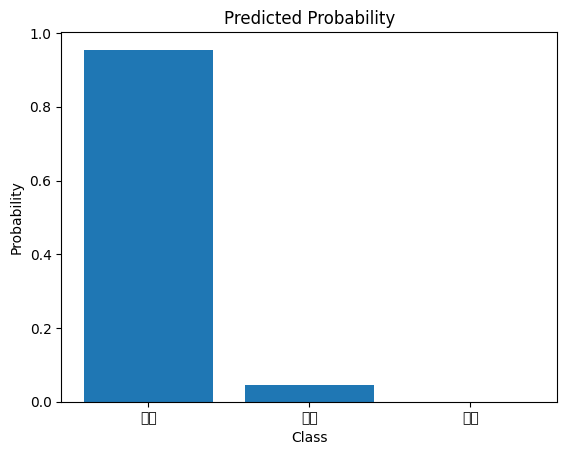

Review: I  happened  to  catch  this  on  TV ,  and  wanted  to  watch  because  I  remembered  the  Spi n  mag azi ne  arti cle  upon  which  the  movie  is  base d .  I  was  very  disappointed .  First ,  if  James  Bel us hi  is  the  lead  actor  in  a  movie ,  it  should  be  a  sign  that  it ' s  not  exactly  an  A - list  production .  Greg ory  Hin es  was  a  world  class  dancer ,  but  sadly  not  a  great  actor .< br  />< br  /> In  fact ,  all  of  the  acting  in  this  film  is  either  flat  or  hamm y ,  which  can  only  be  bla med  on  the  director ,  who  is  this  film ' s  weake st  link .  Charles  Car ner  seemed  to  be  trying  to  ape   Oliver   Stone ' s  " J F K "  in  portraying  the  alle ged  conspi rac y  to  cover  up  the  " real "  child  murderer ( s ),  but  without  the  benefi t  of  a  good  script ,  an  A - list  cast  or ,  it  must  be  said ,  the  talent .  It  just  doesn ' t  work .< br  />< br  /> It ' s  a  shame  that  such  a 

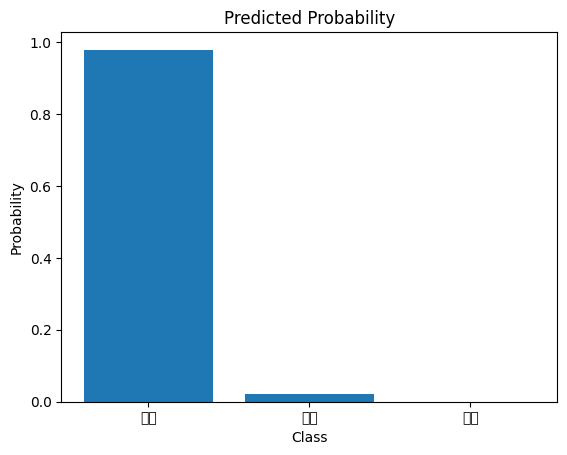

Review: Gree ting s  All , < br  />< br  /> Is n ' t  it  amazing  the  power  that  films  have  on  you  after  the  1st  viewing   ?< br  />< br  /> I  was  so  delight ed  by  the  first  viewing  of  this  film ,  I  couldn ' t  stop  talking  about  " Fla tl ine rs "  to  all  my  friends  for  weeks  -  mind  you  I  was  a  very  impressi ona ble  18   year  old  back  then  and  my  taste  in  films  have  become  a  little  more  conse rv ative  since  then .< br  />< br  /> Then  somehow  I  forgot   about  this  film  until  I  saw  the  DVD  in  my  local  department   store  and  remember ing  how  great  it  was  I  thought  " Ri ght  !  I ' ll  plu ck  you  off  the  shel f  when  they  bring  out  the  Spe cial  Edi tion ".< br  />< br  /> Last  week ,  I  was  over joy ed  when  my  best  friend  invite d  me  over  to  watch  Fla tl ine rs  on  DVD .  The  expectation   was  that  I  would  love  this  film  even  more  on  2 nd  viewing ..  How  wrong  I  was  ! < b

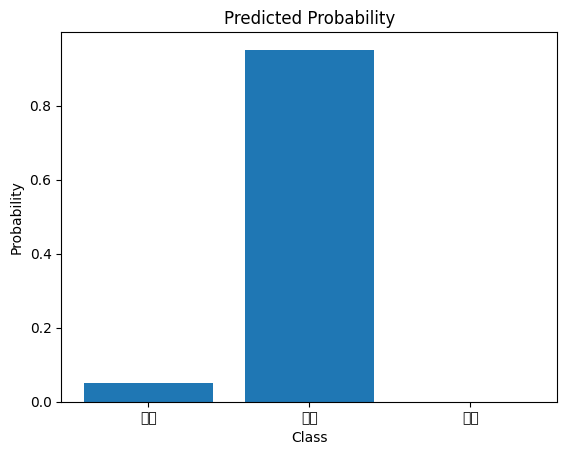

Review: OK ,  so  this  film  is  well  acted .  It  has  good  direction  but  the  simple  fact  is  that  it  under mine s  what  all  gay  and  lesbian   people  have  been  fighting  for  all  these  years .  The  straight  man  " deci ding  to  be  ga y "  and  the  gay  man  " De ci ding  to  be  straight "  I  did  enjoy  it  up  until  the  last  20  minutes ,  after  that  i  got  really  offend ed .  As  what  usually  happens  in  these  films  the  straight  actors  play  the  main  parts  and  the  out  gay  actors  play  the  second ary  straight  roles .  The  leads  are  played  by  handsome   men  but  don ' t  let  that  distract   you  from  the  fact  that  this  is  a  a  film  that  leaves  you  feeling  unf ul fill ed .  All  the  romance  and  relationships  you  hope  would  happen  do  not .  Un less  you  are  a  priest   that  is  in  which  case  god  bles s  straight  woman  who  cure   our  homo s .                                                        

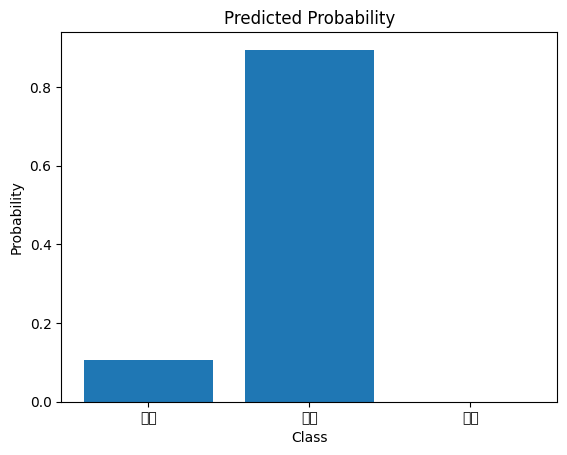

Review: I  liked  most  of  this  film .  As  other  reviews  mentioned  it  has  a  good  cast ,  the  plot  is  interesting  enough .  All  in  all  it  is  fun  to  watch .< br  />< br  /> But  the  ending ,  I  feel ,  is  completely  bot che d ,  it  left  me  be wild ere d .  Yes ,  you  expect  people  cross ing  and  dou ble - cross ing  each  other  in  this  sort  of  movie ,  but  qua dru ple - cross ing ?  Well ,  if  it ' s  justif ied  by  the  plot  then  why  not ? < br  />< br  /> But  that ' s  the  bad  part ,  there ' s  completely  no  need  for  it .  After  a  certain  point  it ' s  all  schem ing  with  completely  no  meaning . ( here  comes  the  SP OI LER ).  After  the  air port   scene  En ric o  and  his  acc om pli ces  already  HA VE  the  money .  I  couldn ' t  understand  the  need  for  the  rest  of  the  sca m .  Is  it  all  necessary  just  to  rub   Fe deri co ' s  nose   in  the  fact  that  he ' s  been  fool ed ?  I  don ' t  buy  it .< br  

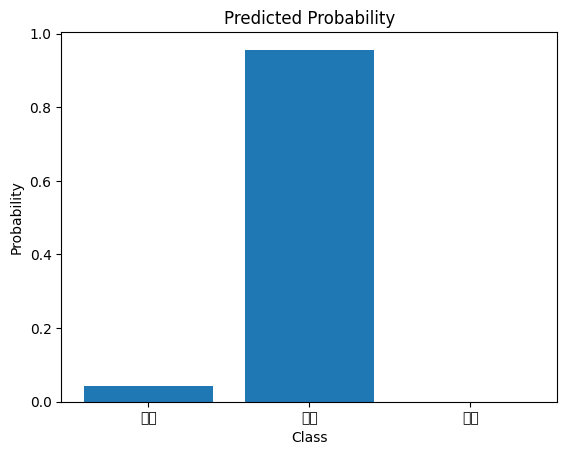

Review: A  tedious   gangster  film  that  leaves  you  wis hing  someone  had  edited  it  far ce  more  rut hl ess ly .  I  would  have  thought  that  the  story  of  the  creati on  of  Las   Ve gas  would  prove  interesting  but  it  fails  at  almost  every  turn .  Warr en  Beat ty ' s  performance  as  the  stupid  and  unl ike able  Bu gs y  Se ig el  leaves  you  wis hing  you  were  watching  someone  else .  Once  or  twice  he  flash es  through  the  fo g  of  his  performance  to  deliver  an  interesting  scene  but  most  of  the  time  you  just  can ' t  care  about  him .  Ann ette   Ben ning  gives  a  skill ed  turn  as  his  unt ru st worthy  lover  but  even  she ' s  only  fa int ly  more  sav our y  than  he  is .< br  />< br  /> I  really  wouldn ' t  bother  with  this  tur gi d  drama  unless  you ' re  a  Ben ning  devot ee .                                                                                                                                    

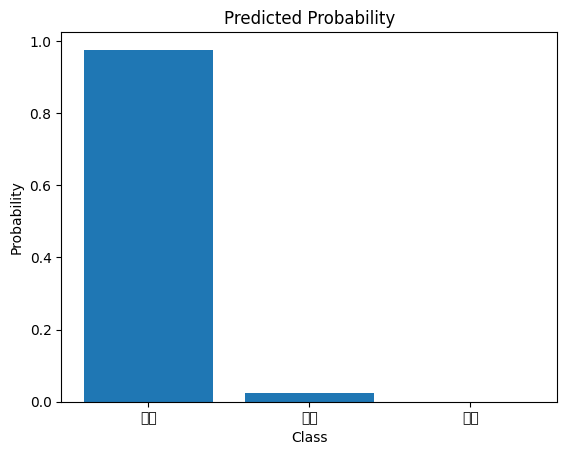

Review: This  is  unfortunately  Carl in ' s  last  record ed  H BO   conce rt ,  from  a  series  that  last ed  over  30  years .  Though  this  may  not  be  his  " best "  work ,  it  is  excellent ,  funny ,  and  thought  provok ing .  This  record ing  is  also  a  bit  different  from  most  of  his  other  conce rt s  that  it  is  a  bit  length ier  than  most  of  his  other  conce rt s .< br  />< br  /> Through out  his  long ,  pro li fic ,  and  inf lu enti al  career ,  Carl in  has  moved  from  the  more  observ ation al  humor  and  far t  jokes ,  towards  a  more  ' human ita rian '  view point  of  society  and  culture .  His  focus  on  the  English  Lan gua ge  and  eu phe mis ms  increas ed  throughout  the  years ,  and  cul minat es  in  this  performance .  Tho ugh ,  I  would  argu e  that  his  audi o  book  " When  Will  Jesus  Bri ng  the  Po rk   Cho ps ?"  best  display s  his  vas t  wit   with  regard s  to  language ,  eu phe mis ms ,  and  the  br

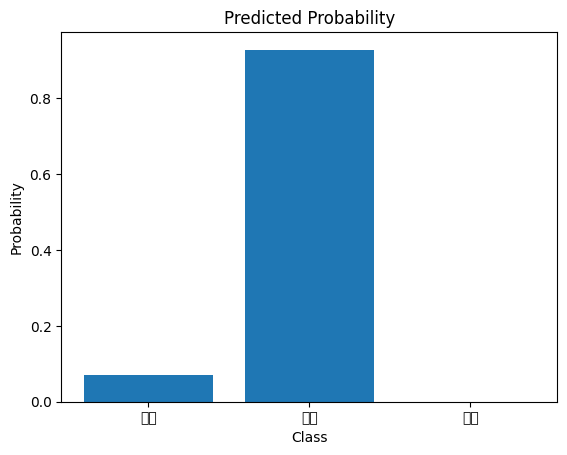

Review: All  those  who  are  into  the  P C  culture  are  ag has t  at  the  dog mati c  Christian  view  of  this  film ,  claim ing  it  contains  racis t  idea tion  and / or  religious  into ler ance .< br  />< br  /> Those  who  don ' t  care  about  this ,  but  are  ori ent ed  towards  slic k  production  values  and  competen t  acting  are  dism ay ed  at  the  lack  of  such  here .< br  />< br  /> Those  who  dec ry  both  of  these  are  apo ple ctic   that  this  production  was  let  loose  on  the  general  public ,  as  evidence d  in  comments  here .< br  />< br  /> What  is  an  interesting  premise ,  which  isn ' t  original ,  but  is  a  combination  of  GH O ST  and  F RO M  BE Y ON D ,  is  deal t  with  in  a  rather  imm ature   manner  in  this  film ,  yet  done  with  gus to .  What  the  crew  and  actors  lack ed  in  sensi bil ity ,  professional  abilit ies  and  technical  expert ise  is  somewhat  off set  by  the  intens ity  they  display .< br 

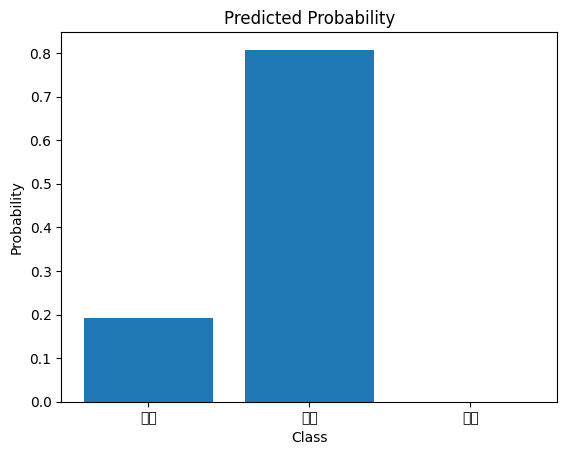

Review: The  first  word  i  can  find  to  describe  this  movie  is  Aw ful .< br  />< br  /> This  movie  is  one  of  the  worst  movies  I  have  ever  seen .  First  of  all  is  the  plot  a  very  thin  plot  ( Wo nt  comment  further  on  this  part )  and  a  plot  which  a  lot  of  movies  from  this  genre  is  follow ing .  This  makes  the  movie  so  bad ,  because  you  know  what s  going  to  happen .  Second ly  does  the  movie  contain   a  lot  of  questions  which  never  is  revealed .  One  of  the  question s  ( and  this  is  no  spoiler )  is :  WH AT   THE  HE LL  AR E  THE  KI D S  DO IN G  IN  THAT   CO R N !!!!!! !!!!   Thi rd ly  is  the  characters  very  bad ,  not  only  because  the  movie  is  bad ,  but  also  because  of  the  sorry  actors .  They  are  bad  as  they  can  be .< br  />< br  /> The  last  thing  that  make  this  movie  bad ,  is  that  its  a  horror  movie .  You  are  supposed  to  be  scared  of  the  killing s  or  the  sud

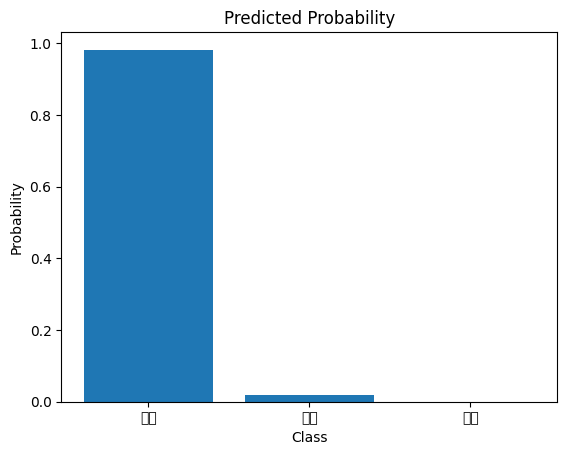

Review: If  you  are  like  me  and  observ ed  the  original  " Ben ji "  phe nom eno n  from  af ar ,  finally  seeing  the  movie  for  the  first  time  30 +   years  later ,  you  may  be  shocked   to  discover  how  truly  awful  it  is ,  and  more  my stif ied  than  ever  about  its  popula rit y  back  in  197 4 .< br  />< br  /> My  jud gm ent  is  not  entirely  object ive  as  I  tend  to  have  a  favor able  bia s  toward  children ' s  films  and  for  that  reason  cut  them  considera ble  sla ck .  On  the  other  hand  I  have  always  hated  this  particular  dog ,  a  feature  on  the  last  couple  seasons   of  " Pe tt ico at  Jun ction ".  Never  a  great  show ,  the  dog - less  early  episodes  were  at  least  a  nice  show case  of  beautiful  actresses  and  the  introduc tion  of  the  dog  cut  into  their  screen  time .< br  />< br  /> Ben ji   is  an  8 6 - minute  me ga - dos e  of  the  dog ,  following  him  on  several  dai ly  circ uit s  throu

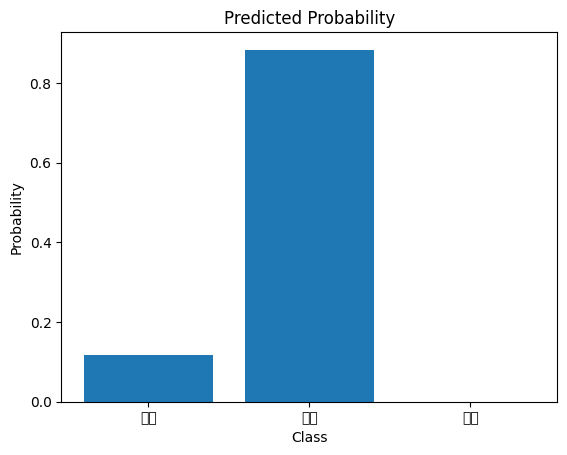

Review: Man ,  I  can ' t  believe  the  largely  harsh   and  negative  comments  for  this  movie .  Okay ,  it  sure  ain ' t  no  soph isticat ed  work  of  cinematic  art .  But  it  is  a  good  deal  of  entertaining ly  tack y  fun .  For  start ers ,  the  tit ular   pu mp kin - headed   supernatural   killer  dud e  has  to  be  one  of  the  single  most  laugh ably  silly  and  uns car y  things  to  ever  stumble   in  front  of  a  camera ;  he  looks  like  something  you  would  see  in  a  four th - rate  car ni val   spoo kh ous e .  Second ly ,  the  moder ate  gore  is  ridiculous ly  fake  and  unconvincing ,  with  the  definit e  highlight   occurr ing  when  this  annoying  upt ight  ult ra - conse rv ative  woman  gets  electr oc ute d  by  a  to ast er .  Then  there ' s  the  always  welcome   presence  of  the  ever - lovely  Lin ne a  Qui gle y ,  who ' s  memorabl y  introduced  taking  a  nice ,  long ,  utterly  gratuitous  show er  that  goes  on  for  

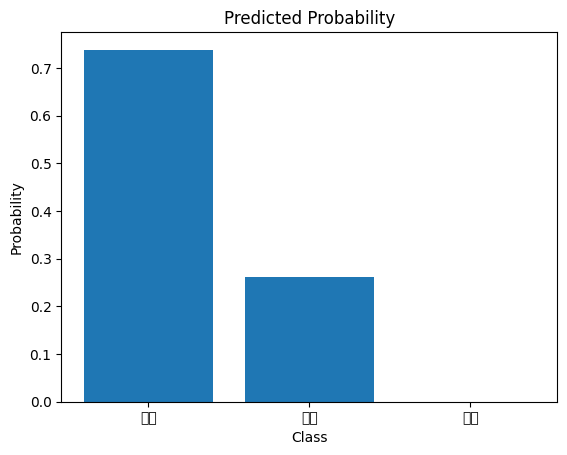

Review: Not  every  line  in  a  comedy  is  funny .  This  movie  takes  a  serious  subject ,  the  dise n fran chi se ment  of  vote rs  and  holds  it  up  to  the  light  while  telling  jokes  about  it .  It ' s  the  movie  The  Da ily  Show   would  have  made  if  they  wanted  to  turn  it  into  a  movie .  I  found  Robin  Williams  to  be  much  funnie r  in  this  movie  than  he  was  in  R V .  And  while  my  wife  and  I  share  a  few  oppos ing  political  views ,  we  were  both  dou ble d  over  in  laughter   for  several  parts  of  this  movie .  The  script  writers  here  could  give  Fox   New s  some  lesson s  in  fair  and  balance d .  Lewis   Black  was  okay  for  his  part ,  but  never  really  seemed  to  be  able  to  bring  out  his  particular  bran d  of  comedy  for  his  role .  Christopher  Walke n  was  also  good ,  playing  his  fairly  common  sub du ed  supporting  role ,  push ing  a  story  along .                                     

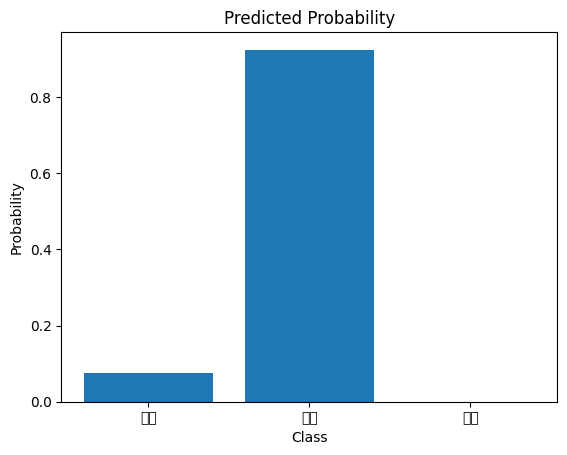

Review: Horr ible  acting  with  the  worst  special  f / x  I ' ve  ever  bore   witness   too .  It ' s  bad  enough  I  waste d  $ 3  to  watch  this  cru mmy   pile   of  crap ,  but  it ' s  the  hour  and  a  half  time  I  lost  that  I  could ' ve  been  doing  anything  else  like  getting  a  root   can al  or  volu nte ering  for  ju ry  du ty .  Ge tting   drunk  couldn ' t  even  help  this  video .< br  />< br  /> To  put  it  blu ntly ,  I  sincer ely  believe  I  actually  lost  a  few  I Q   points  during  the  course  of  watching  this  idiot ic  piece  of  mind - nu mbi ng  " work " !  Perhaps  I  should  have  followed  my  own  advice   this  time .  Never  expect  a  decent  film  if  it ' s  written ,  directed  and  produced  by  the  same  person ,  and  never  EVER   expect  anything  of  value  from  Jeff  Fa hey .                                                                                                                                                 

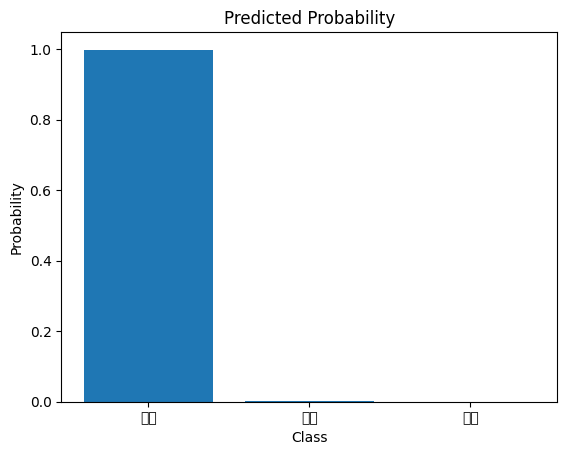

Review: I  wish  the  series  had  not  ended  so  soon .  Although  the  acting  may  not  be  the  greatest  in  the  world ,  it  does  end  on  a  positive  note  and  does  teach   moral s  and  values  to  the  viewers .  Hi lar y  Sw an k  did  a  good  job  of  portraying  a  High  Sch oo l  student  who  had  lost  her  parents ,  etc .  Mi ya gi   was  great  as  in  the  previous  3 !!  If  you  are  not  into  the  happy  ending ,  this  movie ,  like  the  previous  3  in  the  series  is  not  for  you .  This  day  in  which  we  live  you  can  not  see  enough  about  the  bad  guys  getting  what  they  deserve  and  the  good  guys  coming  out  on  top .  The  Bi ble  teache s  that  good  will  always  tri ump h  over  evil .  That  is  exactly  what  happens  in  this  one .  It  is  a  great  family  movie .  Please  see  it  if  you  have  not  alr ead y .                                                                                                            

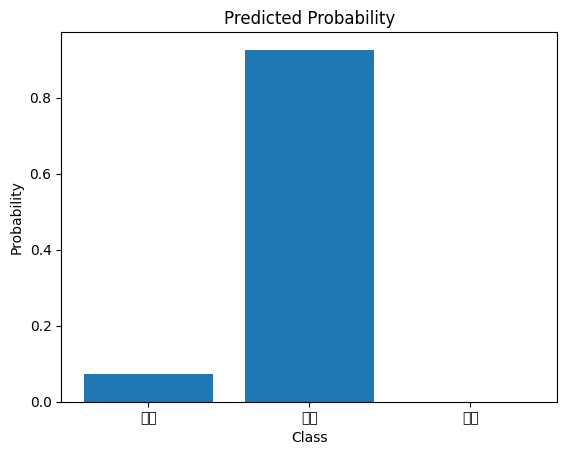

Review: A  cut  above  from  the  usual  straight  to  video  action ee r ,  Ai rb orn e  has  enough  in  the  tan k  to  keep  it  going  for  the  full  90  minutes ,  although  you  can ' t  help  but  think  of  how  low  forme r  ' 80 ' s  comedy  gold en  boy  Steve  Gu tte n bur g  has  stoo ped  to  be  in  such  a  cheap  production  ( and  playing  a  hard  man  too !).  The  plot  is  simple ,  the  bad dies  have  stolen   a  dead ly  vir us  and  Gu tte n bur g  and  the  rest  of  his  good ie  pal s  are  sent  to  retr iev e  it ,  Not  bad  of  its  kind  but  not  in  the  same  lea gue  ( obvious ly )  as  the  films  it  is  compared  too  on  the  cover  such  as  AI R  FO R CE   ONE   and  CO N  AI R .  The  cast  is  good  though ,  with  Sean  Bea n  repr ising   his  Brit . - bad  guy  character  which  we  have  had  a  glimpse   of  in  such  box  office  sma she s  as  GO LD EN E Y E  and  PA TR I O T  G A ME S .                                             

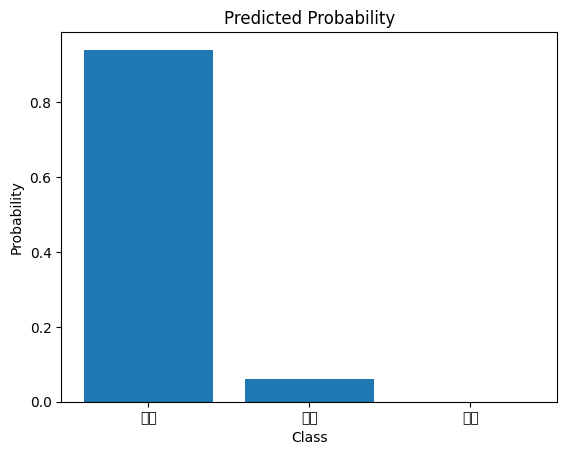

1/2 [==============>...............] - ETA: 0s

KeyboardInterrupt: ignored

In [23]:
# 처음 100개 리뷰에 대한 예측 및 그래프 시각화
import matplotlib.pyplot as plt


# 처음 100개 리뷰에 대한 예측 및 그래프 시각화
count = 0
for x, y in test_data:
    predictions = model.predict(x)
    for i in range(len(x)):
        if count >= 100:
            break
        predicted_label = tf.argmax(predictions[i]).numpy()
        true_label = y[i].numpy()
        review_text = " ".join([tokenizer.decode([word]) for word in x[i].numpy()])  # 각 단어를 디코딩하여 문자열로 변환
        print(f"Review: {review_text}")
        print(f"Predicted Label: {predicted_label} (0: 부정, 1: 긍정, 2: 중립)")
        print(f"True Label: {true_label}")
        print("="*50)

        # 예측 확률을 바 차트로 시각화
        classes = ["부정", "긍정", "중립"]
        probs = predictions[i][:len(classes)]

        # 클래스 수가 확률값 수보다 적은 경우, 부족한 부분을 0으로 패딩
        while len(probs) < len(classes):
            probs = np.append(probs, 0.0)

        # Convert to NumPy array
        probs = np.array(probs)

        # 바 차트 생성
        plt.bar(classes, probs)
        plt.title("Predicted Probability")
        plt.xlabel("Class")
        plt.ylabel("Probability")
        plt.show()

        count += 1

2/2 [==============================] - 2s 130ms/step


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48512 (\N{HANGUL SYLLABLE BU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44557 (\N{HANGUL SYLLABLE GEUNG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47549 (\N{HANGUL SYLLABLE RIB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


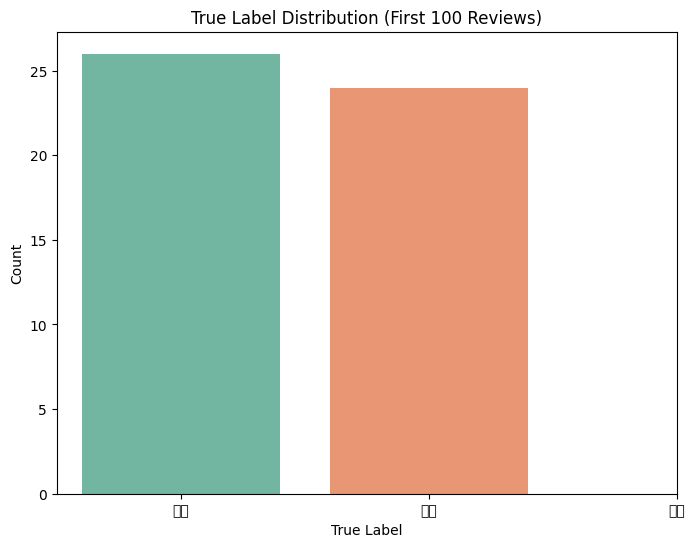

In [26]:
# 처음 50개 리뷰에 대한 예측 및 레이블 분포 시각화

import matplotlib.pyplot as plt
import seaborn as sns


count = 0
predicted_labels = []
true_labels = []

for x, y in test_data:
    predictions = model.predict(x)
    for i in range(len(x)):
        if count >= 50:
            break
        predicted_label = tf.argmax(predictions[i]).numpy()
        true_label = y[i].numpy()
        predicted_labels.append(predicted_label)
        true_labels.append(true_label)
        count += 1

# 레이블 분포 시각화
plt.figure(figsize=(8, 6))
sns.countplot(x=true_labels[:100], palette="Set2")
plt.xticks(ticks=[0, 1, 2], labels=["부정", "긍정", "중립"])
plt.xlabel('True Label')
plt.ylabel('Count')
plt.title('True Label Distribution (First 100 Reviews)')
plt.show()